# Домашнє завдання до лекції 5: візуалізація даних.
В цьому ДЗ ми будемо багато працювати не тільки з візуалізаціями, а і з функціоналом pandas, адже візуалізація даних - це частина аналізу даних та працює спільно з агрегацією та фільтрацією наших даних. До того ж перед тим, як аналізувати дані, їх треба почистити. Чим ми і займемось.  

0.Імпортуйте matplotlib.pyplot, seaborn та pandas.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Набір даних Taxis

Використовуючи метод з бібліотеки `seaborn` `load_dataset` ми завантажимо перший набір даних для аналізу. Завантажимо дані так, бо це зручно + аби ви знали, що є і така можливість знайти собі набір даних для експериментів.  
Набір даних містить поїздки таксі у Нью Йорку у 2019 році. Детальний опис на [сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Які колонки мість набір даних:  
- `pickup` - час початку поїздки  
- `dropoff` - час закінчення поїздки  
- `passengers` - кількість пасажирів у поїздці  
- `distance` - відстань поіздки  
- `fare` - базова плата за поїздку  
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги (за це також платить пасажир)  
- `total` - сумарна плата за поїздку  
- `color` - колір авто, яке здійснювало поїздку  
- `payment` - метод оплати  
- `pickup_zone` - зона, у якій почалась поїздка  
- `dropoff_zone` - зона, у якій закінчилась поїздка  
- `pickup_borough` - район, у якому почалась поїздка  
- `dropoff_borough` - район, у якому закінчилась поїздка  

Назви ознак здбільшого говорять самі за себе. Слово borough перекладається з англійської як "район".

Ми будемо працювати сами з тим шматочком даних, які наявні в seaborn.  
Переглянути всі набори даних з seaborn можна [тут](https://github.com/mwaskom/seaborn-data).

Спершу - завантажуємо дані - просто виконайте клітинку нижче.

In [3]:
df_taxi = sns.load_dataset('taxis')

1.Виведіть 
- перші 3 записи з набору даних
- типи даних в наборі даних df_taxi
- розміри набору даних

In [4]:
display(df_taxi[0:3])

pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      Manhattan       Manhattan  
2           West Village      Manhattan       Manhattan

In [5]:
df_taxi.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [5]:
df_taxi.shape

(6433, 14)

Очікуваний результат (можна вивести в окремих клітинках):

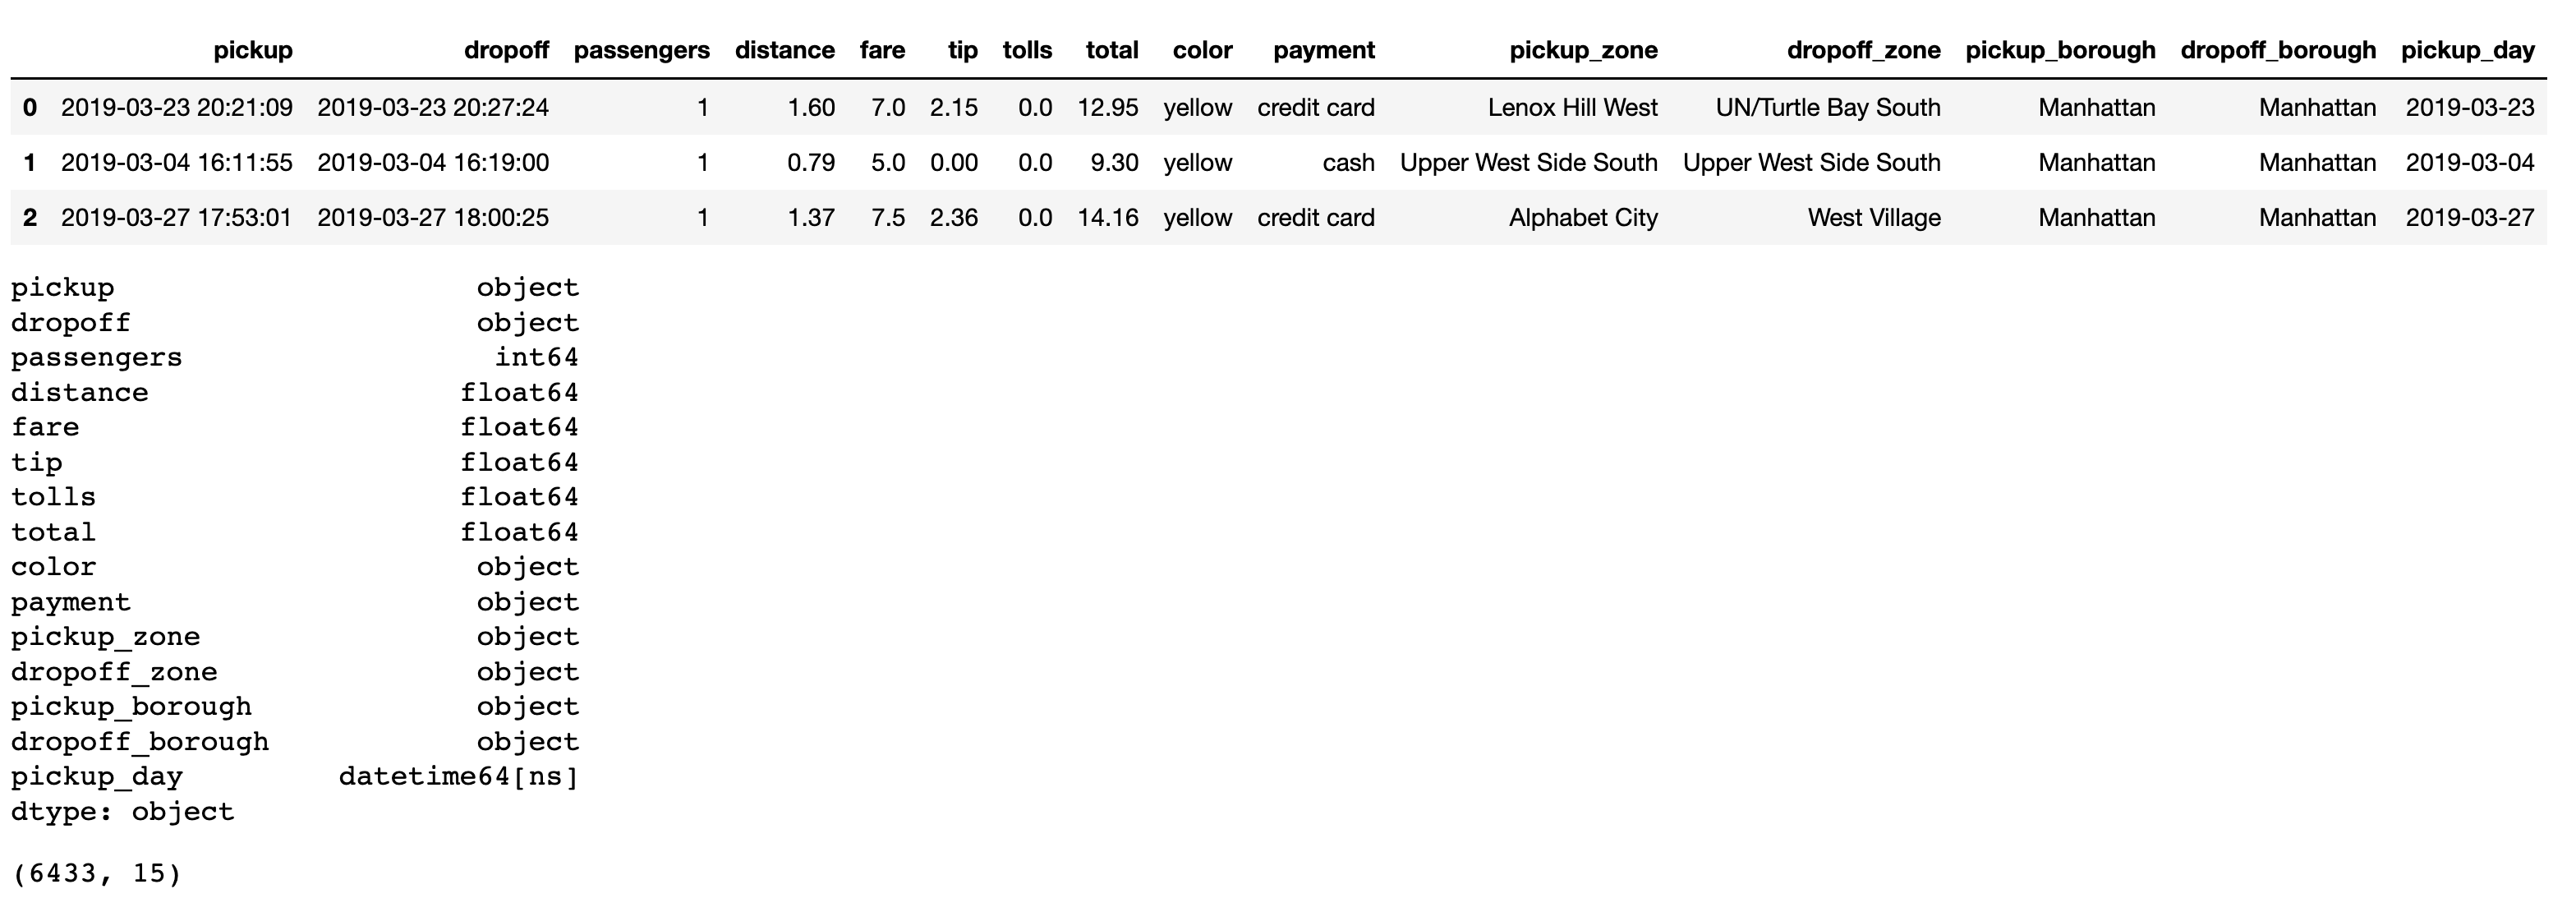

2.Перевіримо, чи є в цьому наборі даних пропущені значення. Для цього можемо вивести кількість пропущених значень в кожній колонці наступним чином (це надзвичайно корисна команда, запамʼятайте її):

In [6]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

Цікаво, чому дані відсутні? Відповідь на це питання нам дасть розуміння, чи можна такі дані видалити, чи можливо їх треба якось заповнити. Виведіть на екран ті рядки, де колонка, яка має найбільше пропущених значень (або одна з тих, що має максимальну кількість пропущених), має пропущені значення. 
Подивіться на результат і напишіть свої думки щодо питань:
- чому на ваш погляд в цих рядках є відстуні дані в кількох колонках? Чому ви так думаєте?
- чому на ваш погляд є рядки з distance==0, а total!=0? Як ви до цього прйишли?
Відповідь просто текстом. Можна використовувати будь-які допоміжні операції над датасетом чи джерела, які допоможуть вам відповісти на ці питання. Якщо щось використовуєте, то це треба зазначити у відповіді.  

Ваша відповідь тут - це 70% виконання цього завдання.

In [7]:
df_taxi[df_taxi['payment'].isnull()] #виводимо рядки, де payment = null для візуального аналізу


pickup             dropoff  passengers  distance  fare  tip  \
7    2019-03-22 12:47:13 2019-03-22 12:58:17           0       1.4   8.5  0.0   
445  2019-03-19 06:57:14 2019-03-19 07:00:08           1       1.3   5.5  0.0   
491  2019-03-07 07:11:33 2019-03-07 07:11:39           1       1.6   2.5  0.0   
545  2019-03-27 11:03:43 2019-03-27 11:14:34           1       4.2  15.0  0.0   
621  2019-03-15 17:16:35 2019-03-15 17:25:01           1       1.3   7.5  0.0   
770  2019-03-02 03:16:59 2019-03-02 03:17:06           0       9.4   2.5  0.0   
913  2019-03-23 11:26:58 2019-03-23 11:35:17           2       1.3   7.5  0.0   
953  2019-03-08 02:58:37 2019-03-08 03:19:27           2       6.9  23.5  0.0   
1207 2019-03-08 15:41:20 2019-03-08 15:41:23           1       0.0   2.5  0.0   
1372 2019-03-12 09:19:44 2019-03-12 09:43:09           1       1.6  14.5  0.0   
1566 2019-03-18 02:20:59 2019-03-18 02:49:24           1       6.0  23.0  0.0   
1690 2019-03-22 06:24:14 2019-03-22 06:24:14           1       0.0  72.0  0.0   
1704 2019-03-17 04:22:54 2019-03-17 04:44:43           2       4.3  17.5  0.0   
1737 2019-03-29 19:43:51 2019-03-29 19:52:28           1       3.7  12.0  0.0   
1851 2019-03-02 19:20:18 2019-03-02 19:21:06           1       0.1   2.5  0.0   
1860 2019-03-01 11:58:50 2019-03-01 12:10:26           1       0.9   8.5  0.0   
1929 2019-03-13 22:35:35 2019-03-13 22:35:49           1       0.0   2.5  0.0   
1941 2019-03-30 16:57:00 2019-03-30 17:16:31           2       2.6  14.5  0.0   
2353 2019-03-21 10:46:14 2019-03-21 11:06:33           2       2.8  14.0  0.0   
2444 2019-03-10 11:06:54 2019-03-10 11:16:13           1       1.4   8.0  0.0   
3109 2019-03-01 22:48:59 2019-03-01 22:50:37           1       0.0   3.0  0.0   
3372 2019-03-09 13:48:43 2019-03-09 13:59:10           0       1.3   8.5  0.0   
3793 2019-03-24 06:07:30 2019-03-24 06:12:22           1       1.5   6.5  0.0   
3803 2019-03-28 19:48:00 2019-03-28 20:31:39           1      17.7  52.0  0.0   
3983 2019-03-06 21:20:27 2019-03-06 22:15:45           0       9.3  41.5  0.0   
4230 2019-03-13 15:39:06 2019-03-13 15:50:27           1       1.8   9.5  0.0   
4384 2019-03-14 06:58:59 2019-03-14 07:08:24           1       1.8   8.5  0.0   
4474 2019-03-09 00:20:47 2019-03-09 00:27:37           4       0.7   6.0  0.0   
4515 2019-03-31 09:42:47 2019-03-31 09:53:15           1       1.9   9.0  0.0   
4562 2019-03-03 23:02:48 2019-03-03 23:02:57           1       0.1  20.0  0.0   
4746 2019-03-12 07:06:07 2019-03-12 07:06:21           1       1.3   2.5  0.0   
4801 2019-03-26 15:30:50 2019-03-26 15:42:59           1       1.2   9.0  0.0   
4842 2019-03-08 02:56:38 2019-03-08 03:07:24           1       2.4  10.5  0.0   
4915 2019-03-02 19:01:36 2019-03-02 19:08:46           0       1.4   7.0  0.0   
4955 2019-03-23 11:07:11 2019-03-23 11:32:46           1       0.0  19.0  0.0   
5046 2019-03-15 00:10:38 2019-03-15 00:21:39           1       3.1  12.5  0.0   
5068 2019-03-30 11:38:20 2019-03-30 11:40:45           1       0.2   3.5  0.0   
5207 2019-03-19 12:30:27 2019-03-19 12:49:12           0       2.1  13.0  0.0   
5284 2019-03-22 06:24:02 2019-03-22 06:24:11           1       1.7   2.5  0.0   
5586 2019-03-22 22:56:44 2019-03-22 23:02:09           1       1.0   5.5  0.0   
5809 2019-03-02 16:24:08 2019-03-02 16:26:36           1       0.6   4.0  0.0   
5821 2019-03-11 19:36:02 2019-03-11 19:36:14           1       0.1   2.5  0.0   
6169 2019-03-27 02:11:01 2019-03-27 02:12:03           1       4.1   3.0  0.0   
6311 2019-03-12 07:10:30 2019-03-12 07:14:18           1       0.7   4.5  0.0   

      tolls  total   color payment                     pickup_zone  \
7      0.00  11.80  yellow     NaN                     Murray Hill   
445    0.00   6.30  yellow     NaN                     Boerum Hill   
491    0.00   5.80  yellow     NaN                     Murray Hill   
545    0.00  15.80  yellow     NaN               LaGuardia Airport   
621    0.00  11.80  ye

ВІДПОВІДЬ
Бачимо, що для всіх записів, де пропущено payment все рівно нарахований total, тобто поїздки не були безкоштовними. 
Мої варіанти: 
    1) Оплата не пройшла коректно(наприклад, карту заблоковано)  
    2) Дані просто не було зібрано коректно для цих рядків

In [8]:
df_taxi[df_taxi['distance'] == 0] #виводимо рядки, де distance = 0 для візуального аналізу


pickup             dropoff  passengers  distance   fare  \
42   2019-03-30 23:59:14 2019-03-30 23:59:17           1       0.0   80.0   
120  2019-03-21 17:21:44 2019-03-21 17:21:49           1       0.0    2.5   
622  2019-03-12 19:52:36 2019-03-12 19:52:55           3       0.0  120.0   
670  2019-03-08 04:50:48 2019-03-08 04:51:07           1       0.0    2.5   
970  2019-03-29 00:02:00 2019-03-29 00:02:05           2       0.0   45.0   
1080 2019-03-04 14:17:05 2019-03-04 14:17:13           1       0.0    2.5   
1207 2019-03-08 15:41:20 2019-03-08 15:41:23           1       0.0    2.5   
1482 2019-03-10 20:27:25 2019-03-10 20:28:33           1       0.0   52.0   
1690 2019-03-22 06:24:14 2019-03-22 06:24:14           1       0.0   72.0   
1910 2019-03-25 14:37:56 2019-03-25 14:38:22           1       0.0    2.5   
1929 2019-03-13 22:35:35 2019-03-13 22:35:49           1       0.0    2.5   
2398 2019-03-26 21:20:48 2019-03-26 21:29:46           1       0.0    7.5   
2742 2019-03-23 06:20:27 2019-03-23 06:20:59           1       0.0   55.0   
3095 2019-03-19 22:20:25 2019-03-19 22:20:38           1       0.0   52.0   
3109 2019-03-01 22:48:59 2019-03-01 22:50:37           1       0.0    3.0   
3221 2019-03-23 17:11:33 2019-03-23 17:11:50           2       0.0   52.0   
3238 2019-03-09 13:21:11 2019-03-09 13:21:15           2       0.0    2.5   
3377 2019-03-27 15:18:33 2019-03-27 15:19:08           1       0.0    2.5   
3644 2019-03-19 23:30:50 2019-03-19 23:32:33           2       0.0  103.0   
3889 2019-03-30 06:42:55 2019-03-30 06:43:00           1       0.0    2.5   
4118 2019-03-15 14:01:54 2019-03-15 14:01:59           1       0.0   25.0   
4264 2019-03-02 23:51:46 2019-03-02 23:51:49           1       0.0   14.0   
4483 2019-03-30 12:48:47 2019-03-30 12:49:13           6       0.0    2.5   
4550 2019-03-02 17:42:00 2019-03-02 17:42:06           1       0.0    2.5   
4663 2019-03-27 13:57:06 2019-03-27 13:57:15           1       0.0    2.5   
4955 2019-03-23 11:07:11 2019-03-23 11:32:46           1       0.0   19.0   
4972 2019-03-02 20:52:08 2019-03-02 20:54:28           2       0.0    3.5   
5433 2019-03-01 17:53:56 2019-03-01 17:54:19           1       0.0   52.0   
5493 2019-03-06 12:14:00 2019-03-06 12:14:00           1       0.0   10.0   
5545 2019-03-28 14:34:59 2019-03-28 14:38:34           1       0.0    4.0   
5546 2019-03-05 09:43:23 2019-03-05 09:44:15           1       0.0    2.5   
5624 2019-03-11 14:04:50 2019-03-11 14:04:50           1       0.0    2.5   
5638 2019-03-13 12:22:00 2019-03-13 12:22:00           1       0.0   10.0   
5678 2019-03-15 20:34:02 2019-03-15 20:34:10           1       0.0   52.0   
5683 2019-03-12 14:58:48 2019-03-12 15:00:13           1       0.0    3.0   
5697 2019-03-19 07:20:21 2019-03-19 07:20:25           1       0.0    2.5   
5721 2019-03-23 06:48:10 2019-03-23 06:48:29           1       0.0    2.5   
5796 2019-03-14 16:24:48 2019-03-14 16:25:18           1       0.0    2.5   
5957 2019-03-20 12:02:11 2019-03-20 12:16:26           1       0.0    9.5   
6080 2019-03-15 20:42:08 2019-03-15 20:42:18           0       0.0    8.0   
6083 2019-03-19 15:34:00 2019-03-19 15:34:00           1       0.0    5.0   
6117 2019-03-06 07:46:09 2019-03-06 07:50:06           1       0.0    4.0   
6118 2019-03-30 00:49:48 2019-03-30 00:49:56           1       0.0   25.0   
6129 2019-03-26 06:57:27 2019-03-26 06:57:30           1       0.0    7.0   
6244 2019-03-01 14:37:38 2019-03-01 14:37:49           1       0.0    2.5   
6314 2019-03-28 22:36:04 2019-03-28 22:36:07           1       0.0   25.0   
6355 2019-03-16 13:24:04 2019-03-16 13:24:13           1       0.0    2.5   
6356 2019-03-01 16:58:23 2019-03-01 16:58:23           1       0.0    3.0   
6357 2019-03-19 10:43:58 2019-03-19 10:44:07           1       0.0    2.5   
6372 2019-03-20 14:24:28 2019-03-20 14:24:32           1       0.0    2.5   
6393 2019-03-10 18:33:13 2019-03-10 19:32:38           1       0.0   71.2   

        tip  

ВІДПОВІДЬ
Бачимо, що для рядків, де distance = 0 не заповнені рядки pickup_zone, dropoff_zone, pickup_borough, dropoff_borough, що логічно, так як це поїздки, що не відбулися.
Наявність рядків, де distance = 0, а total !=0 логічна, так як total складається з суми таких складників, як fare, tip, tolls.
Тобто якщо поїздка не відбулася, то пасажир все рівно платить за подачу машини, а іноді ще й залишає чайові

3.Заповнимо пусті значення. Оскільки всі колонки набору даних мають пропущені значення в рядках з типом даних рядок, заповнимо пропущені значення рядком `NA`.
Створіть набір даних `df_taxi_clean`, який містить дані `df_taxi` із заповненими пропущеними значеннями у всіх колонках (де ті значення відсутні) значенням `NA`.

**УВАГА!** Надалі в роботі треба використовувати `df_taxi_clean`, ми ж його і створили для того, аби далі ним користуватись :)

In [6]:
df_taxi_clean = df_taxi.fillna('NA')

Після виконання завдання запустіть наступну клітинку:

In [10]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

Очікуваний результат виконання коду в попердній клітинці:

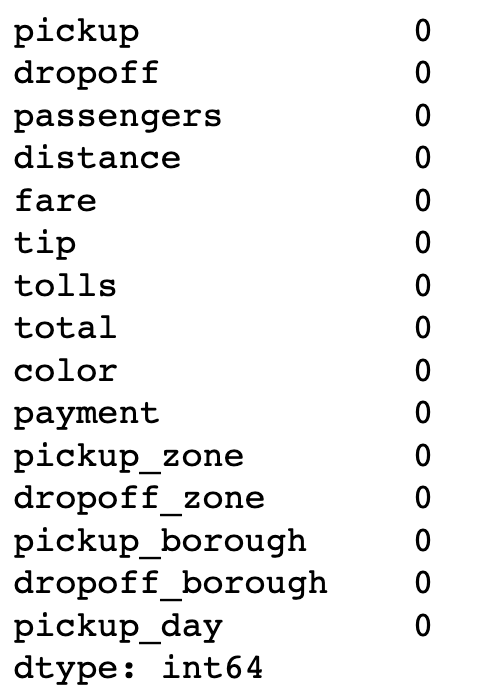

4.Хочеться подивитись на дані у динаміці. Перетворіть колонку `pickup` набору даних `df_taxi_clean` (нам нема чого працювати з "брудними" даними, якщо ми їх вже почистили, але хай будуть в окремій змінній про всяк випадок) у формат `datetime64[ns]`. Результат перетворення збережіть в тій самій колонці `pickup`.

In [7]:
df_taxi_clean['pickup'] = pd.to_datetime(df_taxi_clean['pickup'])


Після виконання завдання запустіть наступну клітинку:

In [12]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

Очікуваний результат виконання коду в попердній клітинці:

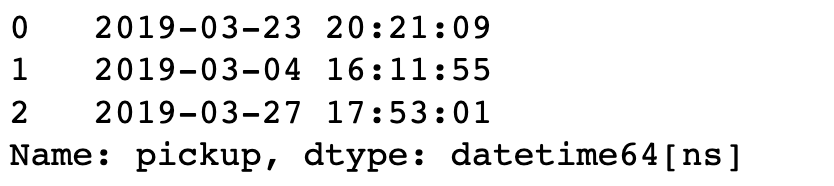

5.У нас колонка pickup зараз мість дані у форматі дата-час. Пропоную прибрати час і зробити аналітику по дням. Для цього виконайте клатинку нижче:

In [8]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

А тепер згрупуйте дані по pickup_day та виведіть графік сумарних платежів по дням. Після виведення графіку скажіть, чи бачите щось дивне на ньому?

In [17]:
total_by_day = df_taxi_clean.groupby('pickup_day').sum(numeric_only=True)['total']
print(total_by_day)

pickup_day
2019-02-28       6.30
2019-03-01    4213.83
2019-03-02    3319.02
2019-03-03    3027.32
2019-03-04    3269.08
2019-03-05    4377.38
2019-03-06    4673.61
2019-03-07    4115.70
2019-03-08    4524.21
2019-03-09    3785.80
2019-03-10    3198.69
2019-03-11    4021.26
2019-03-12    3875.80
2019-03-13    4868.06
2019-03-14    4742.55
2019-03-15    4030.29
2019-03-16    3836.58
2019-03-17    3469.50
2019-03-18    3258.78
2019-03-19    3963.92
2019-03-20    4522.95
2019-03-21    4355.08
2019-03-22    4245.36
2019-03-23    3355.98
2019-03-24    2616.81
2019-03-25    2877.55
2019-03-26    3366.20
2019-03-27    4417.17
2019-03-28    3886.44
2019-03-29    3790.52
2019-03-30    4004.39
2019-03-31    3108.84
Name: total, dtype: float64


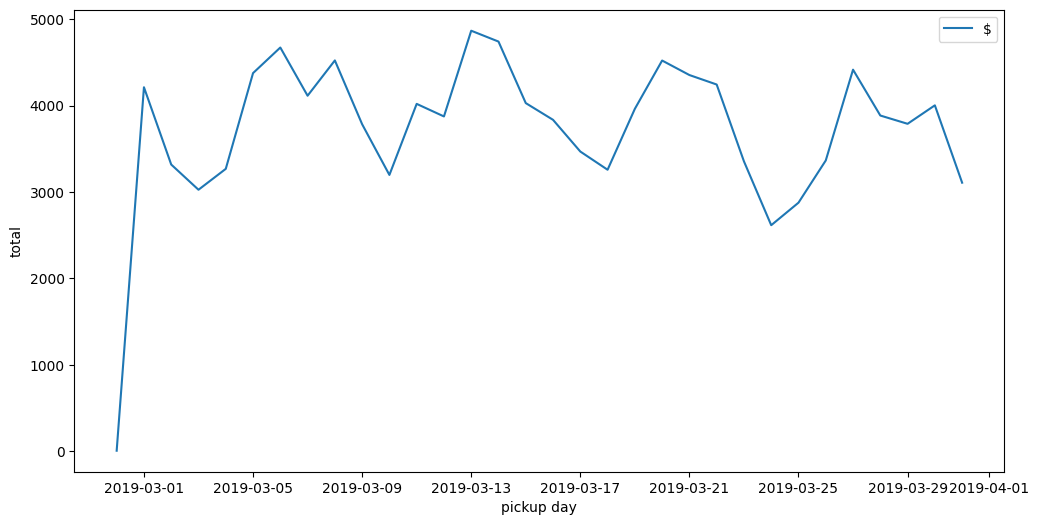

In [10]:
plt.figure(figsize=(12,6))
plt.plot(total_by_day, label='$')
plt.xlabel('pickup day')
plt.ylabel('total') 
plt.legend()
plt.show();

Очікується графік:

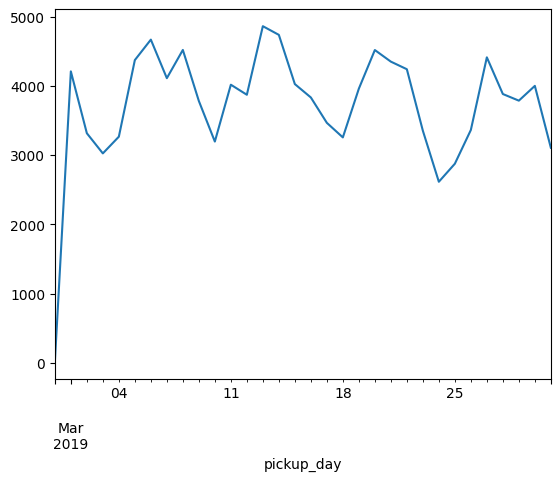

6.Виведіть кількість рядків для кожного pickup_day.

In [15]:
df_taxi_clean.pickup_day.value_counts()

2019-03-14    260
2019-03-06    257
2019-03-13    244
2019-03-01    241
2019-03-08    235
2019-03-20    233
2019-03-27    232
2019-03-22    229
2019-03-05    228
2019-03-21    221
2019-03-16    220
2019-03-12    218
2019-03-07    218
2019-03-30    215
2019-03-11    209
2019-03-29    209
2019-03-23    209
2019-03-28    205
2019-03-09    204
2019-03-15    201
2019-03-19    201
2019-03-02    198
2019-03-31    187
2019-03-10    185
2019-03-17    178
2019-03-26    178
2019-03-18    173
2019-03-04    171
2019-03-03    169
2019-03-25    155
2019-03-24    149
2019-02-28      1
Name: pickup_day, dtype: int64

Маєте побачити, що для дати 2019-02-28 є тільки один рядок. Це запис, який, схоже, потрапив сюди випадково, видаліть з набору даних df_taxi_clean рядок, що містить pickup_day рівний 2019-02-28. Та знову виведіть графік сумарних платежів по pickup_day.

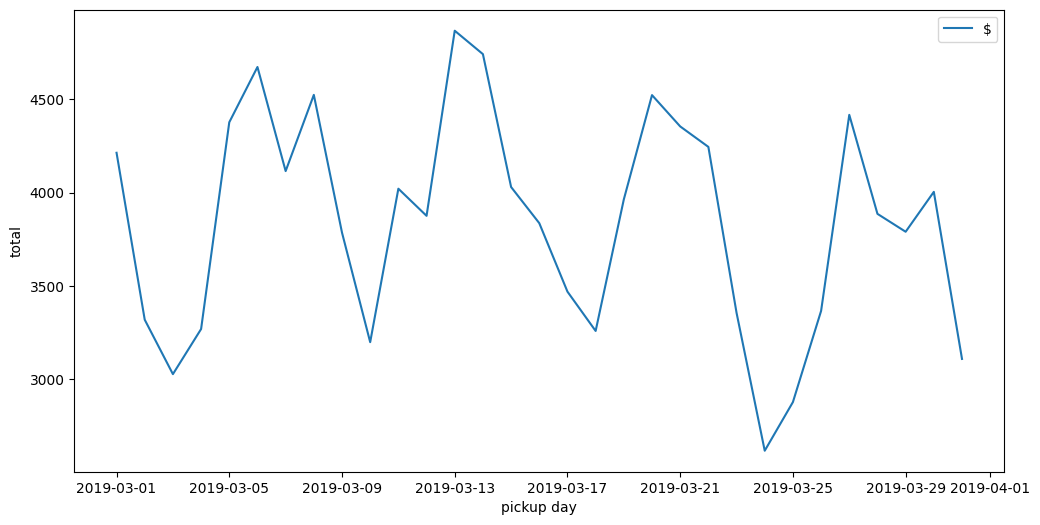

In [16]:
#df_taxi_clean = df_taxi_clean.drop('pickup_day'== 1)
df_taxi_clean = df_taxi_clean[df_taxi_clean.pickup_day != " 2019-02-28" ]
total_by_day = df_taxi_clean.groupby('pickup_day').sum(numeric_only=True)['total']
plt.figure(figsize=(12,6))
plt.plot(total_by_day, label='$')
plt.xlabel('pickup day')
plt.ylabel('total') 
plt.legend()
plt.show();

Очікуваний графік:

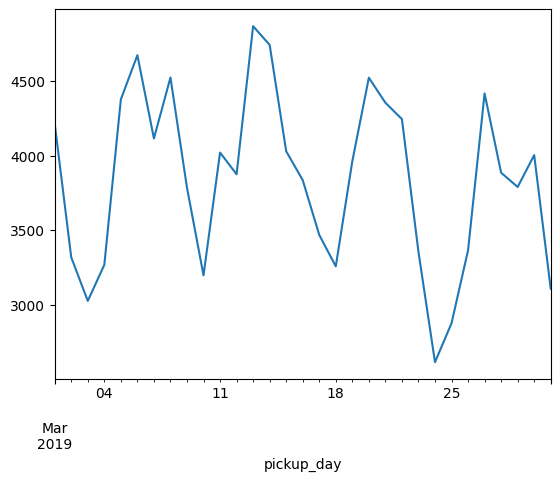

7.Давайте подивимось на динаміку сумарних платежів по районам. Для цього сформуйте на основі `df_taxi_clean` зводну таблицю, де рядками є `pickup_day`, колонками `pickup_borough`, а значенням - сума платежів. Запишіть зводну таблицю в змінну `borough_pivot`. Наостанок, вилучіть колонку зі значенням `pickup_borough` рівним `NA` - уявімо, що ці дані нас не цікавлять.

In [14]:
df_taxi_clean = df_taxi_clean[df_taxi_clean!='NA']
borough_pivot = pd.pivot_table(df_taxi_clean, index = ['pickup_day'],columns=['pickup_borough'], values='total', aggfunc='count')
display(borough_pivot)

pickup_borough  Bronx  Brooklyn  Manhattan  Queens
pickup_day                                        
2019-02-28        NaN       NaN        NaN     1.0
2019-03-01        7.0      17.0      193.0    22.0
2019-03-02        NaN      10.0      171.0    17.0
2019-03-03        3.0      22.0      129.0    14.0
2019-03-04        5.0      10.0      131.0    25.0
2019-03-05        2.0      19.0      179.0    28.0
2019-03-06        4.0      15.0      211.0    26.0
2019-03-07        NaN      16.0      187.0    15.0
2019-03-08        4.0      11.0      197.0    22.0
2019-03-09        4.0       9.0      171.0    18.0
2019-03-10        3.0      10.0      154.0    17.0
2019-03-11        2.0      13.0      171.0    22.0
2019-03-12        2.0      11.0      183.0    21.0
2019-03-13        1.0      16.0      205.0    21.0
2019-03-14        4.0      16.0      214.0    26.0
2019-03-15        4.0      11.0      168.0    17.0
2019-03-16        2.0      19.0      173.0    26.0
2019-03-17        2.0       7.0      148.0    21.0
2019-03-18        2.0       8.0      140.0    22.0
2019-03-19        8.0       8.0      163.0    18.0
2019-03-20        6.0       8.0      193.0    26.0
2019-03-21        1.0      13.0      185.0    21.0
2019-03-22        2.0      16.0      190.0    21.0
2019-03-23        7.0      13.0      170.0    18.0
2019-03-24        1.0      12.0      113.0    21.0
2019-03-25        4.0       7.0      125.0    19.0
2019-03-26        2.0      10.0      144.0    22.0
2019-03-27        8.0       9.0      192.0    23.0
2019-03-28        2.0      14.0      163.0    26.0
2019-03-29        5.0       5.0      180.0    17.0
2019-03-30        1.0      15.0      172.0    24.0
2019-03-31        1.0      13.0      153.0    20.0

In [18]:
borough_pivot.columns

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens'], dtype='object', name='pickup_borough')

Далі запустіть наступну клітинку та дайте відповідь на питання, в якому районі найчастіше найбільша сума денних платежів за поїздки на таксі?   
До речі, також рекомендую спробувати запустити команду `borough_pivot.plot()` та зрозуміти, навіщо нам тут частина `fillna(0)`.

<Axes: xlabel='pickup_day'>

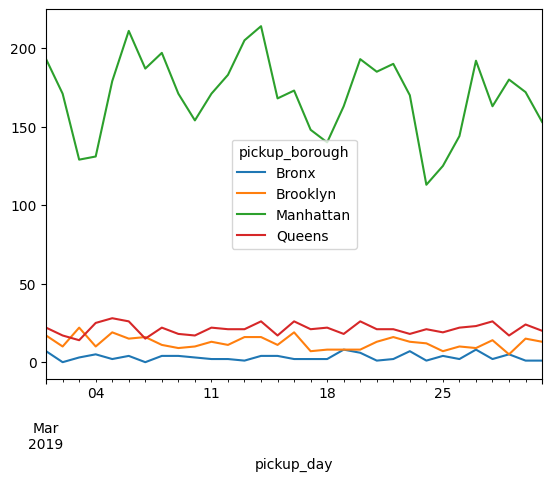

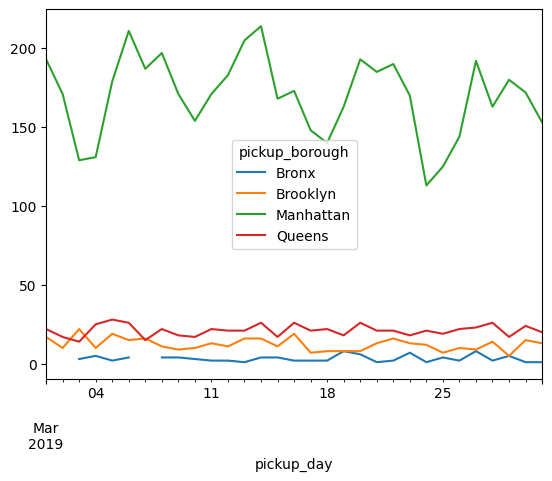

In [19]:
borough_pivot.fillna(0).plot();  #підозрюю, що fillna(0) для того, щоб лінії графіків були суцільними, бо без цієї частини графік має розриви
borough_pivot.plot()
#найбільша сума денних платежів - в Манхеттені

Очікуваний графік :

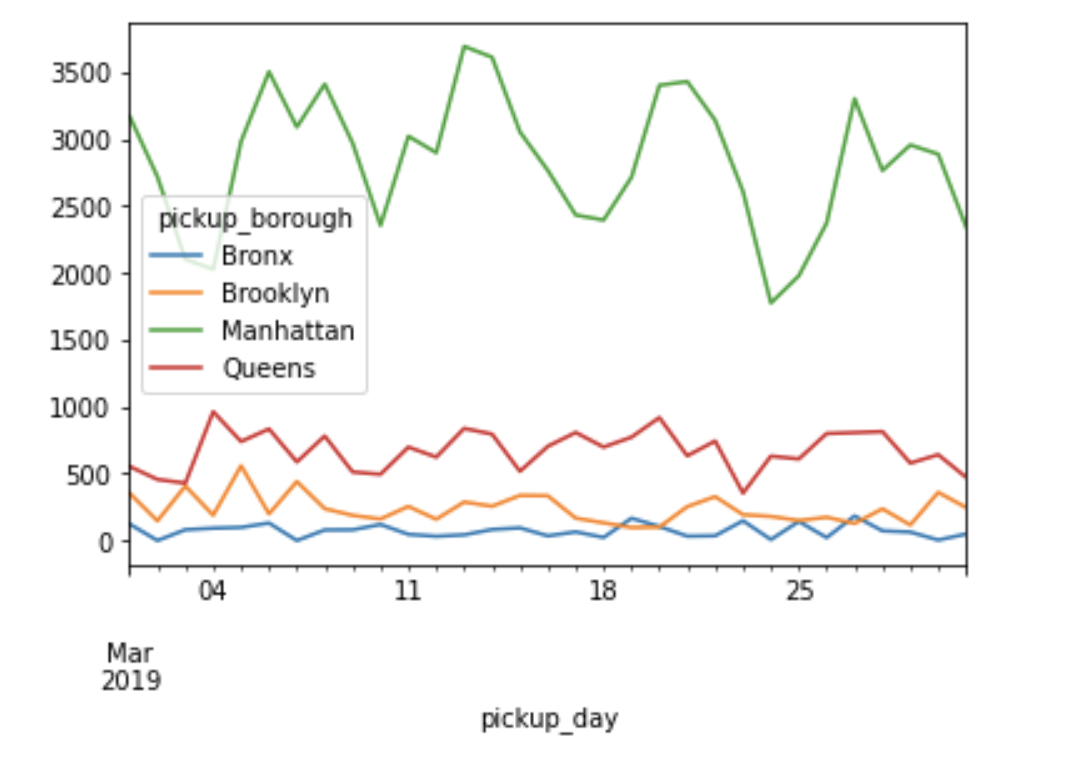

8.Виведіть будь-яким способом гістограми суми денних платежів за поїздки по кожному з районів. Має бути 4 гістограми, на 4ох різних фігурах, або на одній.   
`Підказка:` Найпростіше це буде зробити, використавши `borough_pivot`.  
Пограйтесь з кількістю бінів. Яка кількість бінів на ваш погляд тут є вдалою? Чому?

Text(0, 0.5, 'total')

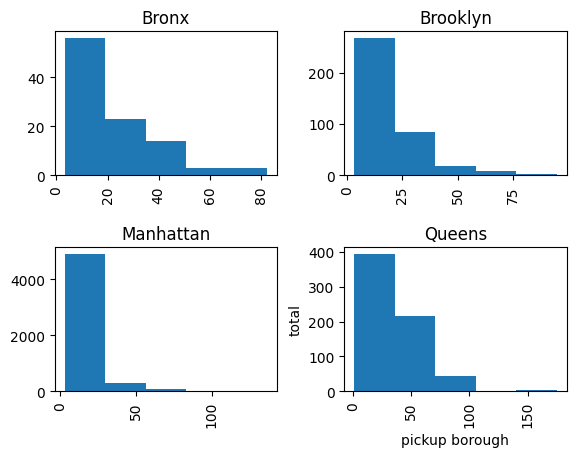

In [35]:
### незавершене рішення
df_taxi_clean.hist(column='total', by='pickup_borough', bins=5)
plt.xlabel('pickup borough')
plt.ylabel('total') 

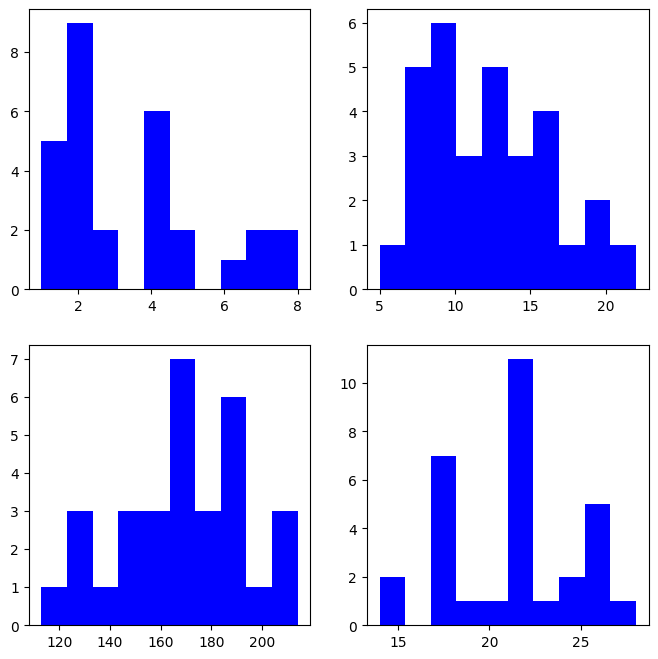

In [20]:
### незавершене рішення

data1 = borough_pivot.loc[:, 'Bronx'].values
data2 = borough_pivot.loc[:, 'Brooklyn'].values
data3 = borough_pivot.loc[:, 'Manhattan'].values
data4 = borough_pivot.loc[:, 'Queens'].values

# Create a figure with four subplots

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Plot the histograms on each subplot
axs[0, 0].hist(data1, bins=10, color='blue')
axs[0, 1].hist(data2, bins=10, color='blue')
axs[1, 0].hist(data3, bins=10, color='blue')
axs[1, 1].hist(data4, bins=10, color='blue')
plt.show()

Приклад одного з правильних виконань завдання:

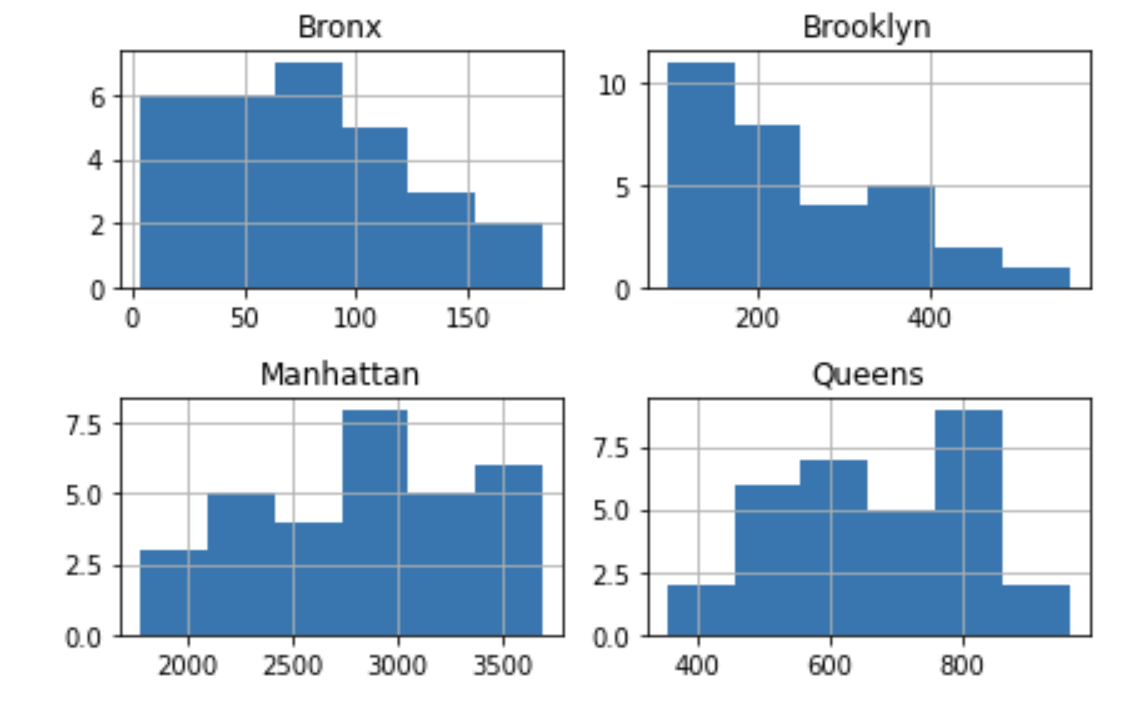

9.Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Припустимо, нам хочеться порівняти розподіли денних сум платежів по райнам. Давайте для цього виведемо 4 гістограми на одній фігурі. Вони звісно ж мають бути різного кольору і напівпрозорими для комфортного перегляду. Створіть гістограму максимально близьку до тої, що надана в очікуваному результаті.
`Підказка:` ця візуалізація створена з допомогою pandas plotting.

pickup_borough
Bronx        Axes(0.125,0.11;0.775x0.77)
Brooklyn     Axes(0.125,0.11;0.775x0.77)
Manhattan    Axes(0.125,0.11;0.775x0.77)
Queens       Axes(0.125,0.11;0.775x0.77)
Name: total, dtype: object

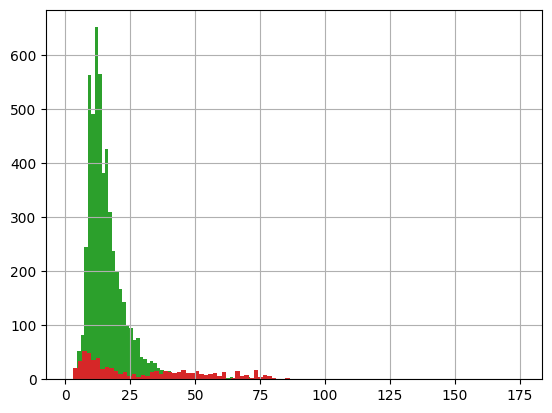

In [32]:
### незавершене рішення
bills = df_taxi_clean.groupby('pickup_borough')['total']
bills.hist(bins=100)

Очікуваний результат:

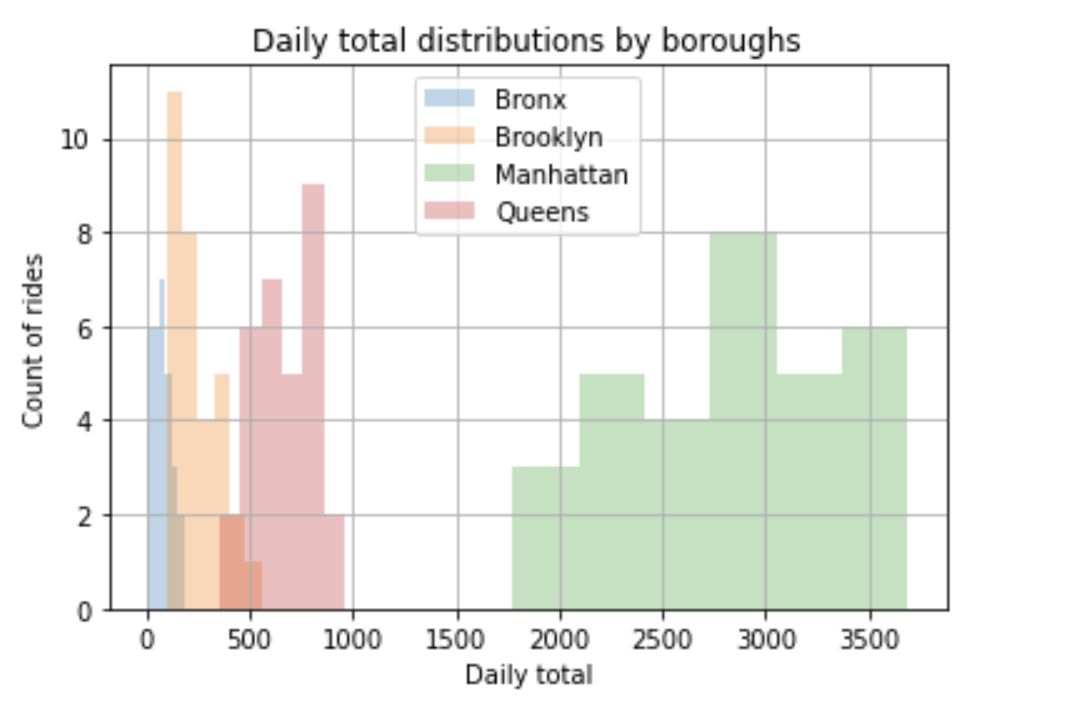

А ось приклад, як можна було сформувати щось подібне з допомогою функціоналу seaborn. Як на мене візуалізація за замовчанням не є зручною для розуміння.  

`Опціональне завдання`: Пограйтесь з налаштуваннями і пошукайте варіант, за якого візуалізація розподілу суми денних платежів через seaborn є на ваш погляд зручною для аналізу.

Text(0.5, 1.0, 'Розподіл суми денних платежів по районах')

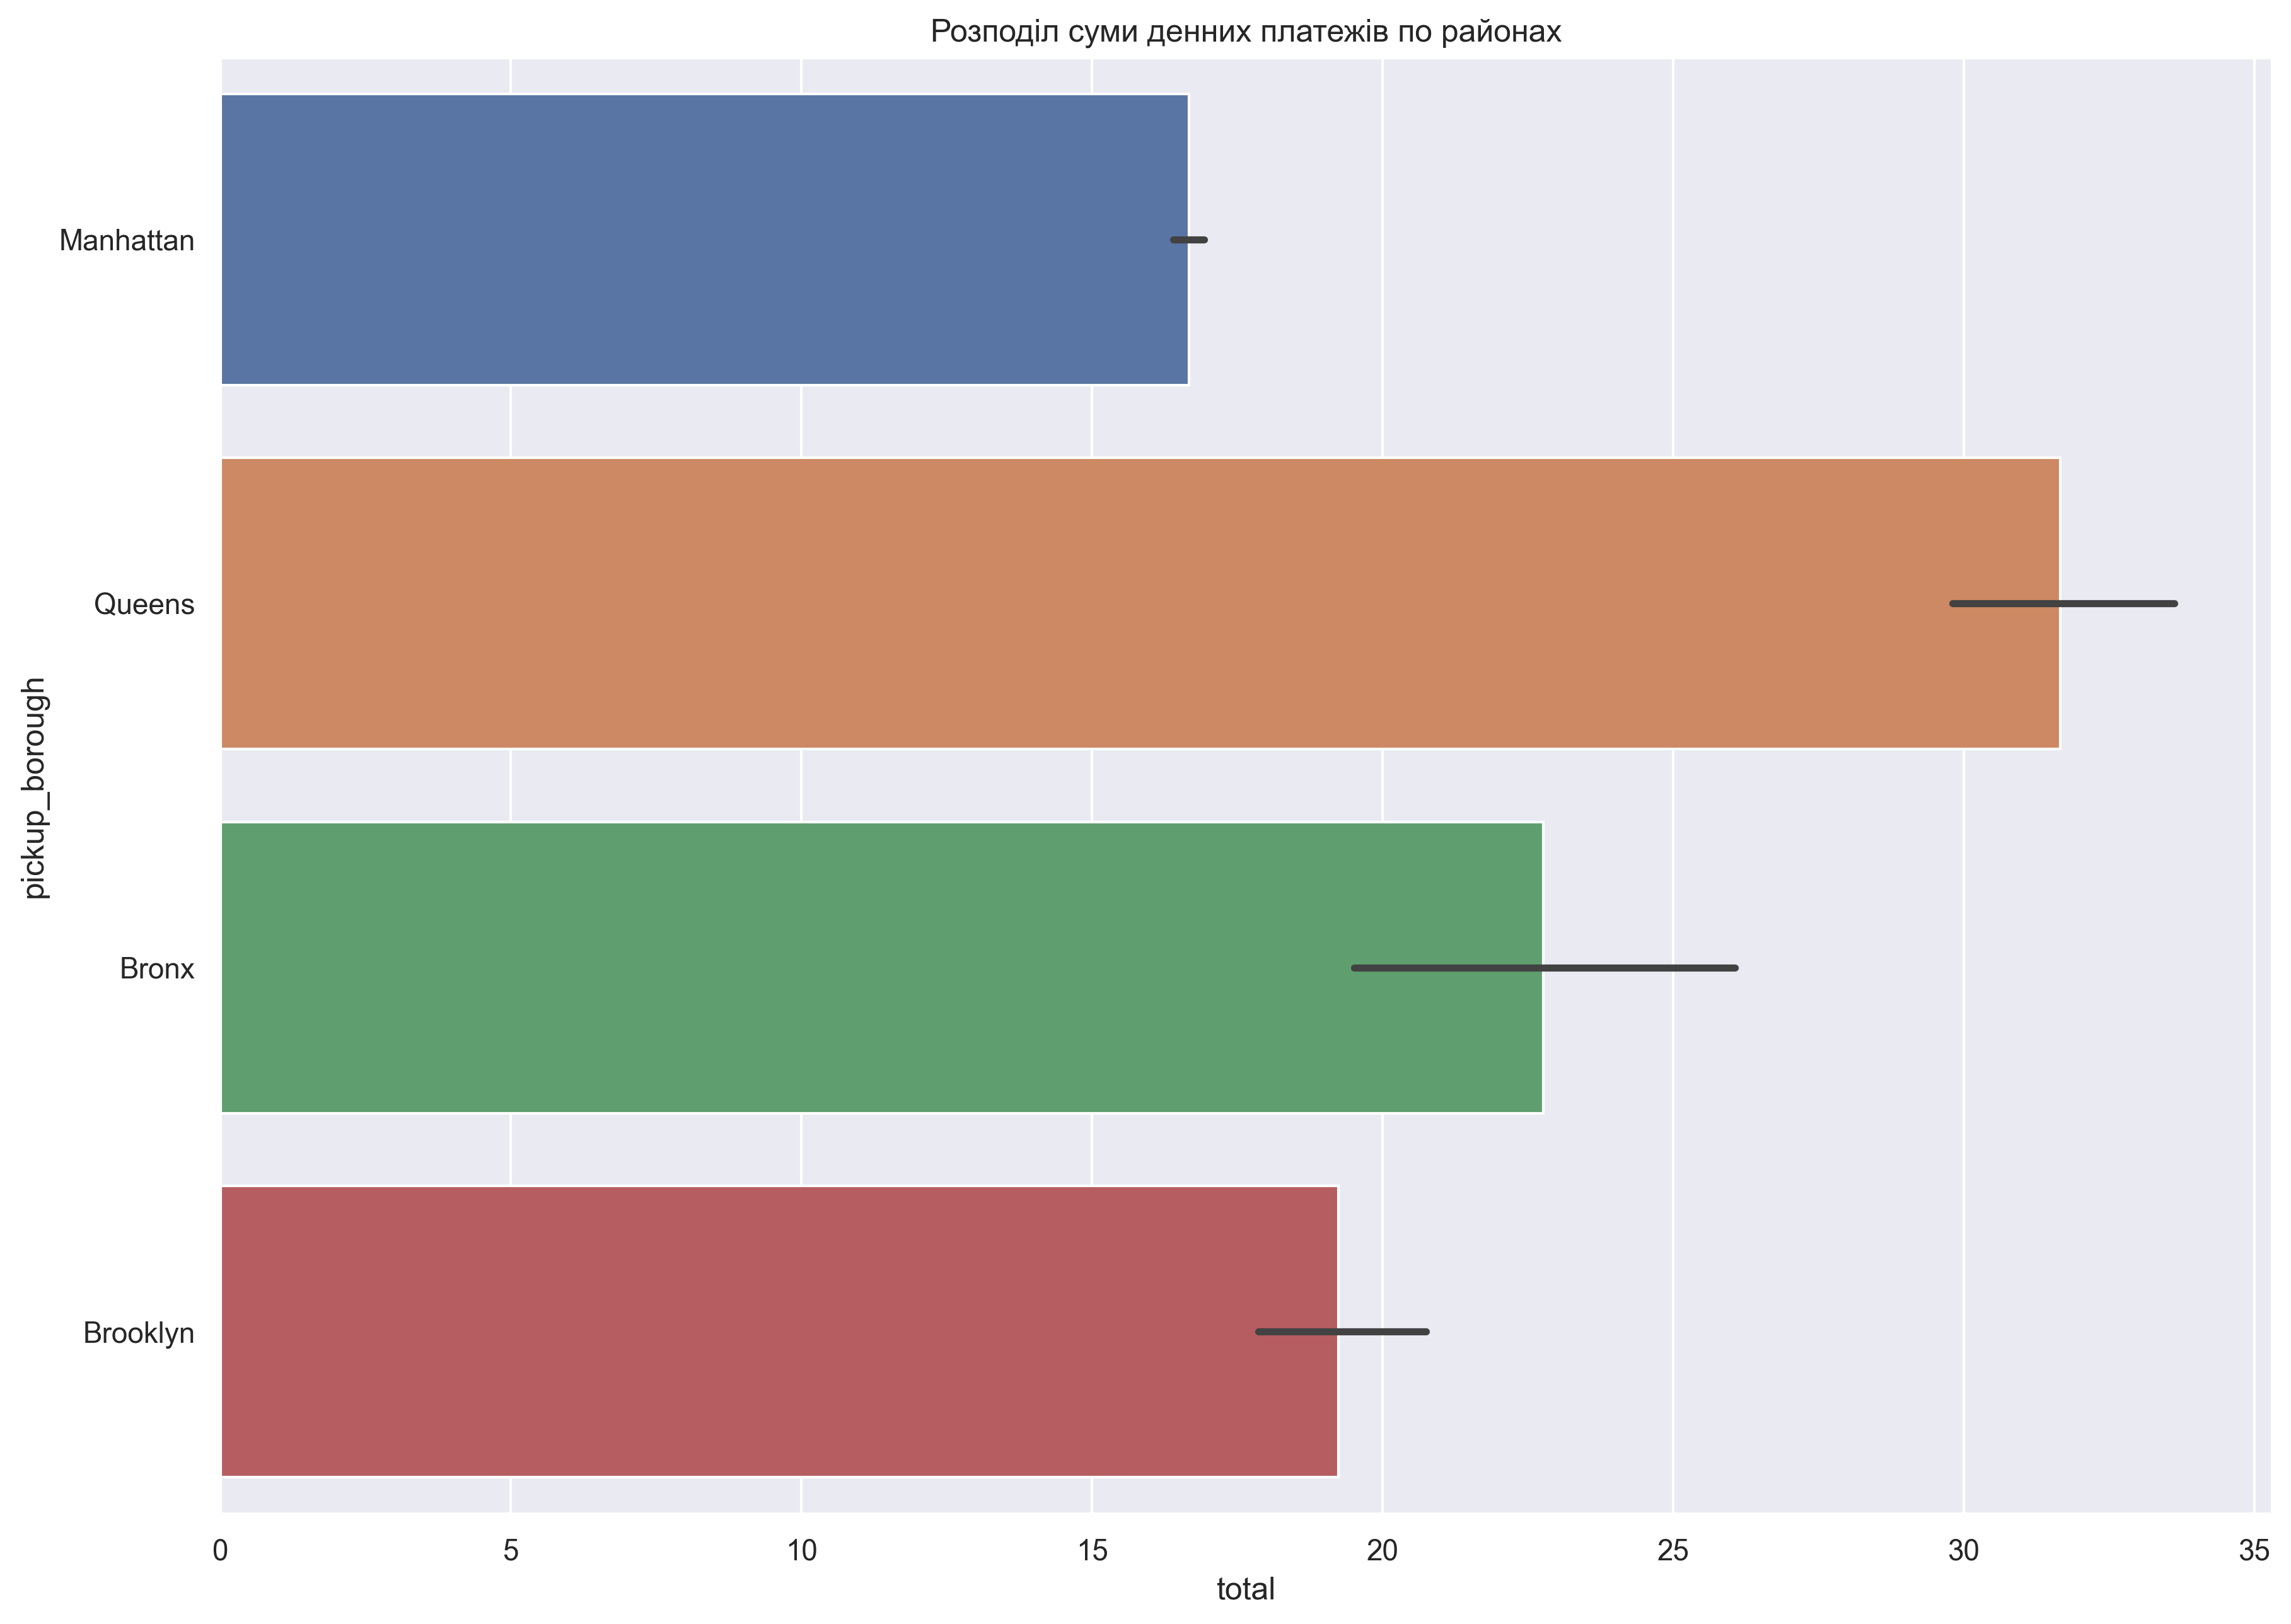

In [48]:
sns.barplot(data = df_taxi_clean, x="total", y = 'pickup_borough');
plt.title('Розподіл суми денних платежів по районах')

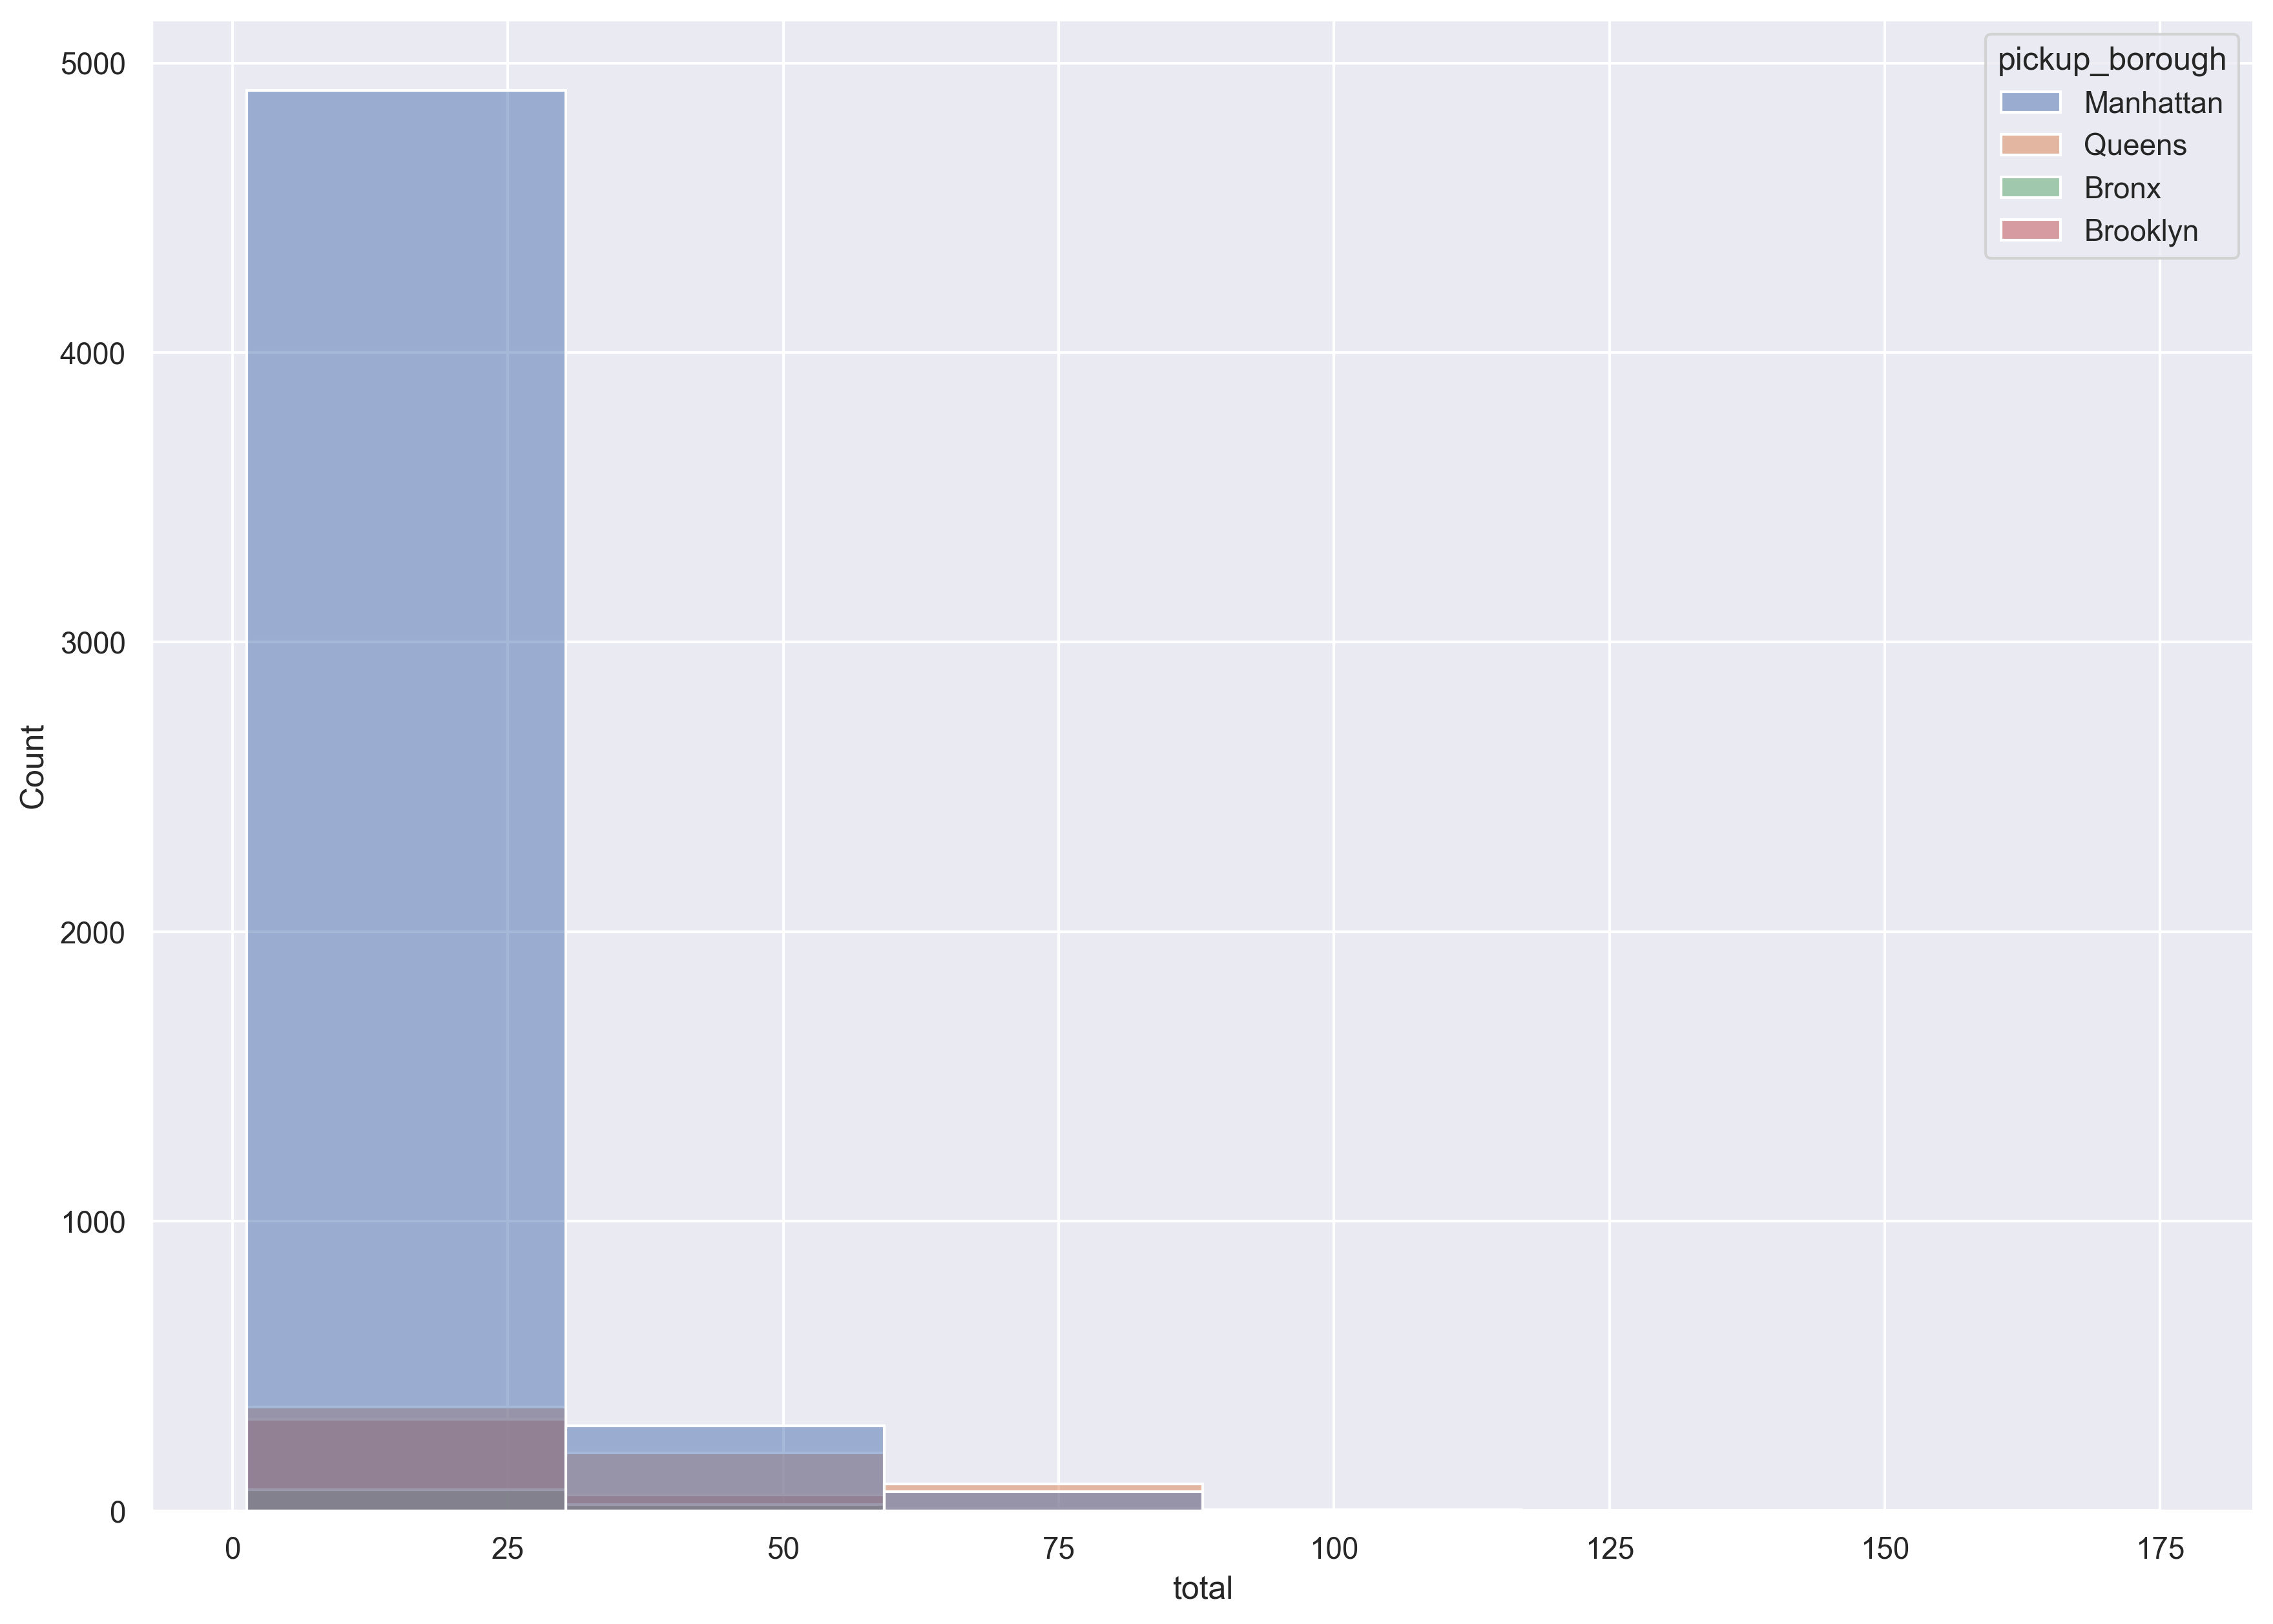

In [45]:
#2 варіант. Міг би бути вдалим, але не ясно, як пересортувати кольори стовбців, щоб при накладанні зберігалася читабельність. 
#Якщо можна - дайте підказку:)
sns.histplot(data = df_taxi_clean, x="total", bins=6, hue = 'pickup_borough');

10.З допомогою seaborn виведіть гістограми суми щомісячних платежів по кольорам автомобілів (колонка `color`). На одній фігурі має бути кількість гістограм рівна кількості різних кольорів автомобілів в наборі даних. Встановіть розмір фігури (10,5) та знайдіть значення dots-per-inch для фігури за якого якість зображення буде хорошою (зображення не буде розмитим).
`Підказки:` 
1. побудувати візуалізацію можна в один рядок коду, і ще один рядок - для встановлення розмірів і роздільної здатності фігури. 
2. для зміни порядку відображення гістограм кольорів автомобілів (аби менша гістограма була перед, а не за більшою) можна посортувати датафрейм за полем кольору так, аби отримати той порядок, який вам потрібен. 

Text(0.5, 1.0, 'Гістограма суми щомісячних платежів по кольорам автомобілів')

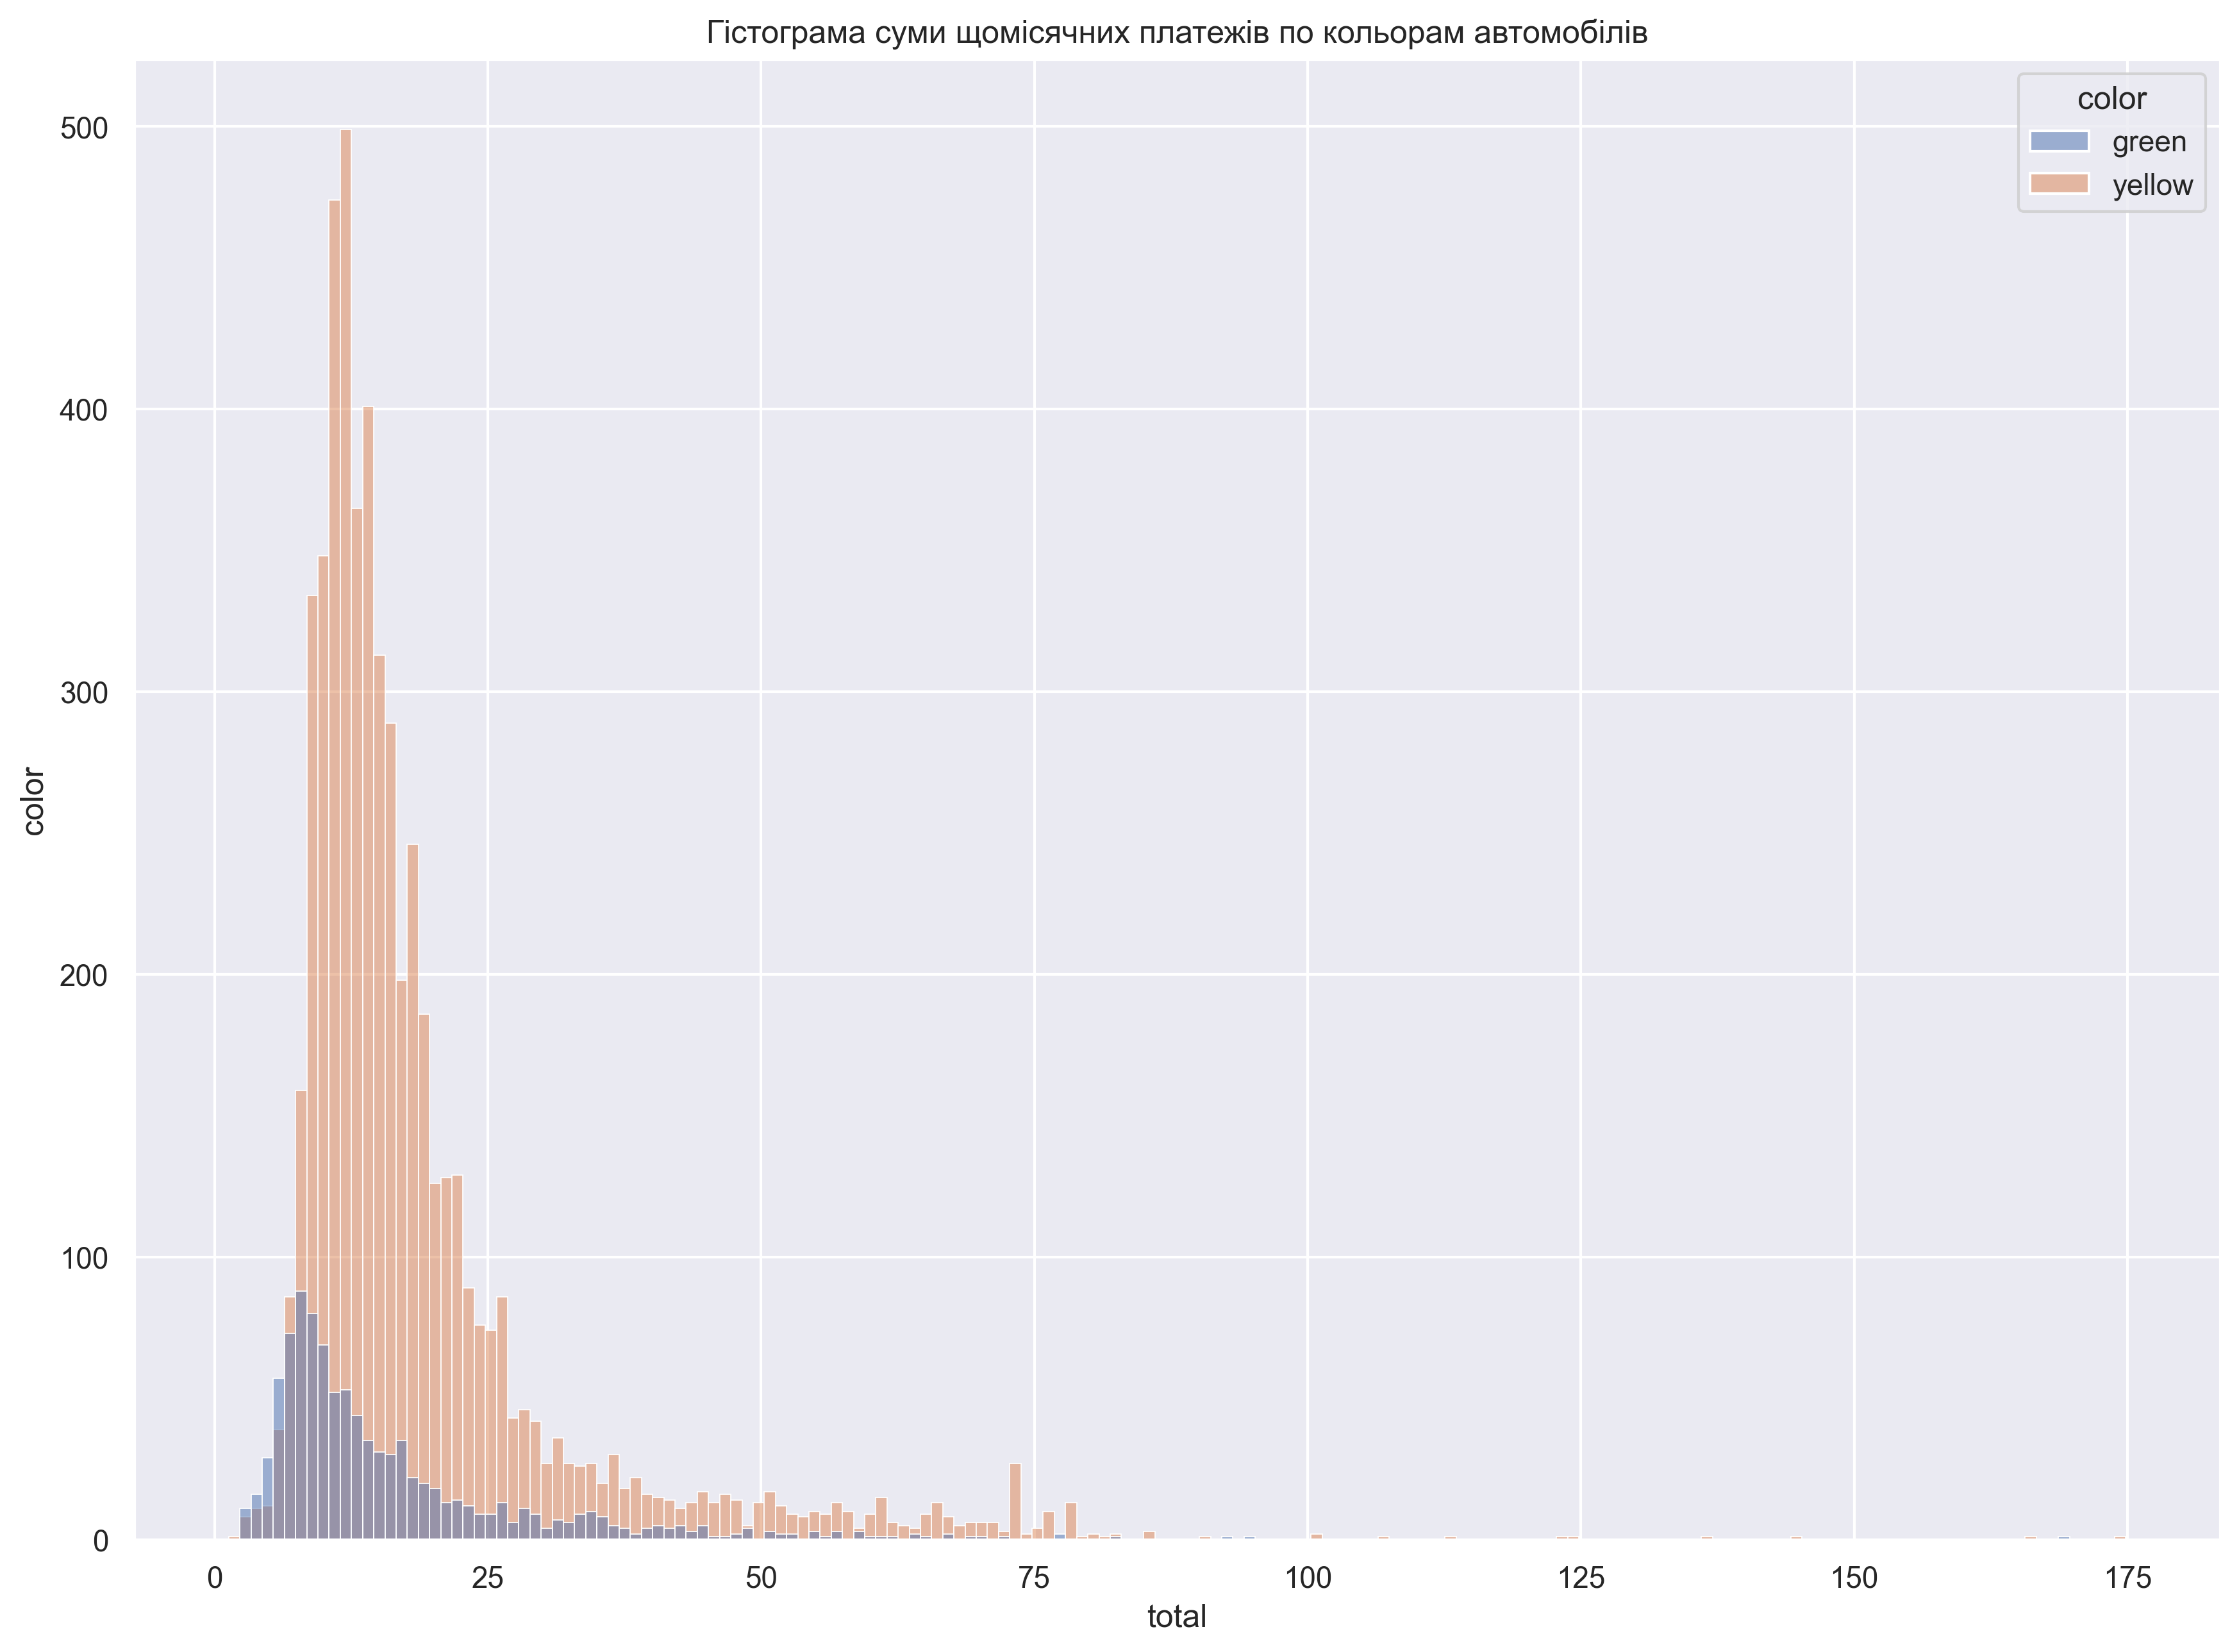

In [36]:
sns.set(rc={"figure.dpi":300, 'figure.figsize':(14,10)})
sorted_df = df_taxi_clean.sort_values(by='color')
sns.histplot(sorted_df, x="total", hue="color", bins=170)
plt.xlabel(
    'total')
plt.ylabel(
    'color')
plt.title('Гістограма суми щомісячних платежів по кольорам автомобілів')

Очікуваний результат:

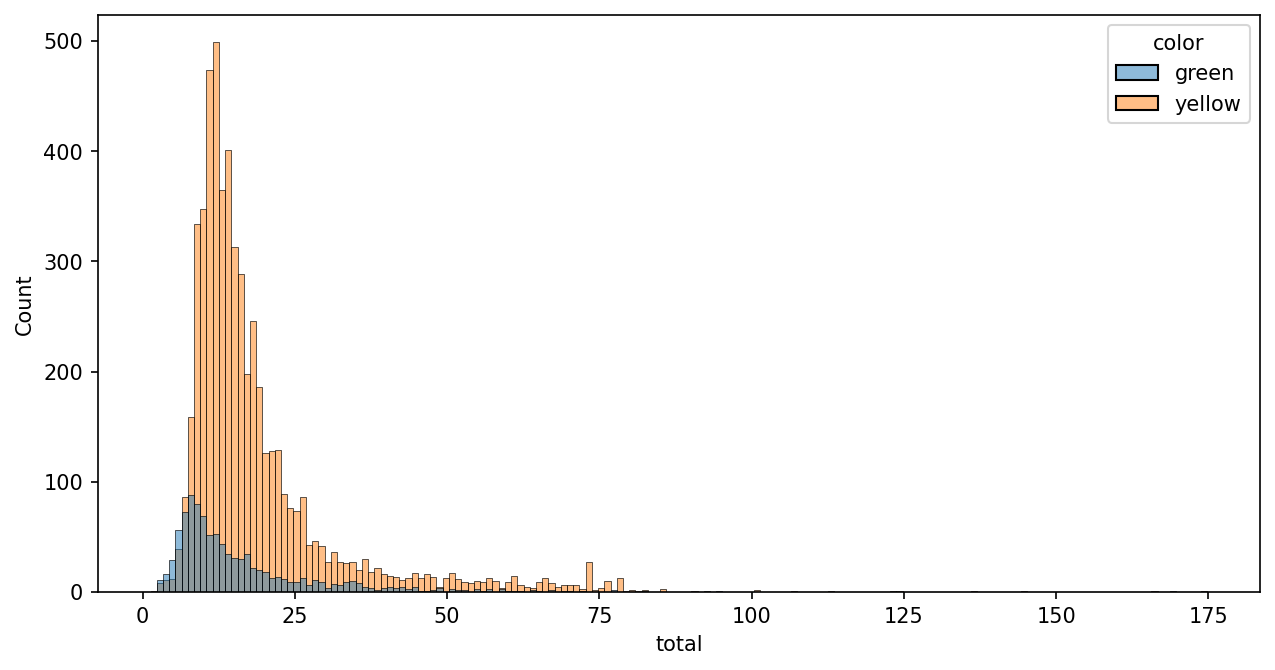

11.Цікаво, а чи є залежність між дальністю поїздки і розміром чайових? Побудуйте діаграму розсіювання між дальністю поїздки і розміром чайових. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

В очікуваному результаті я надаю графік, який би будувала я. На наведеному прикладі найскладніша частина - це зробити червоною цю лінію тренду (вона побудована з допомогою спеціального типу графіку в seaborn). Аби вказати колір лінії в тому типу графіку треба зазначити в параметрі `scatter_kws`, що ми хочемо лінію червоного кольору. Але якщо у вас не буде виходити лінія червоного кольору - нехай буде синього - це не критично :) 

Text(0.5, 1.0, 'Діаграма залежності між дальністю поїздки та чайовими')

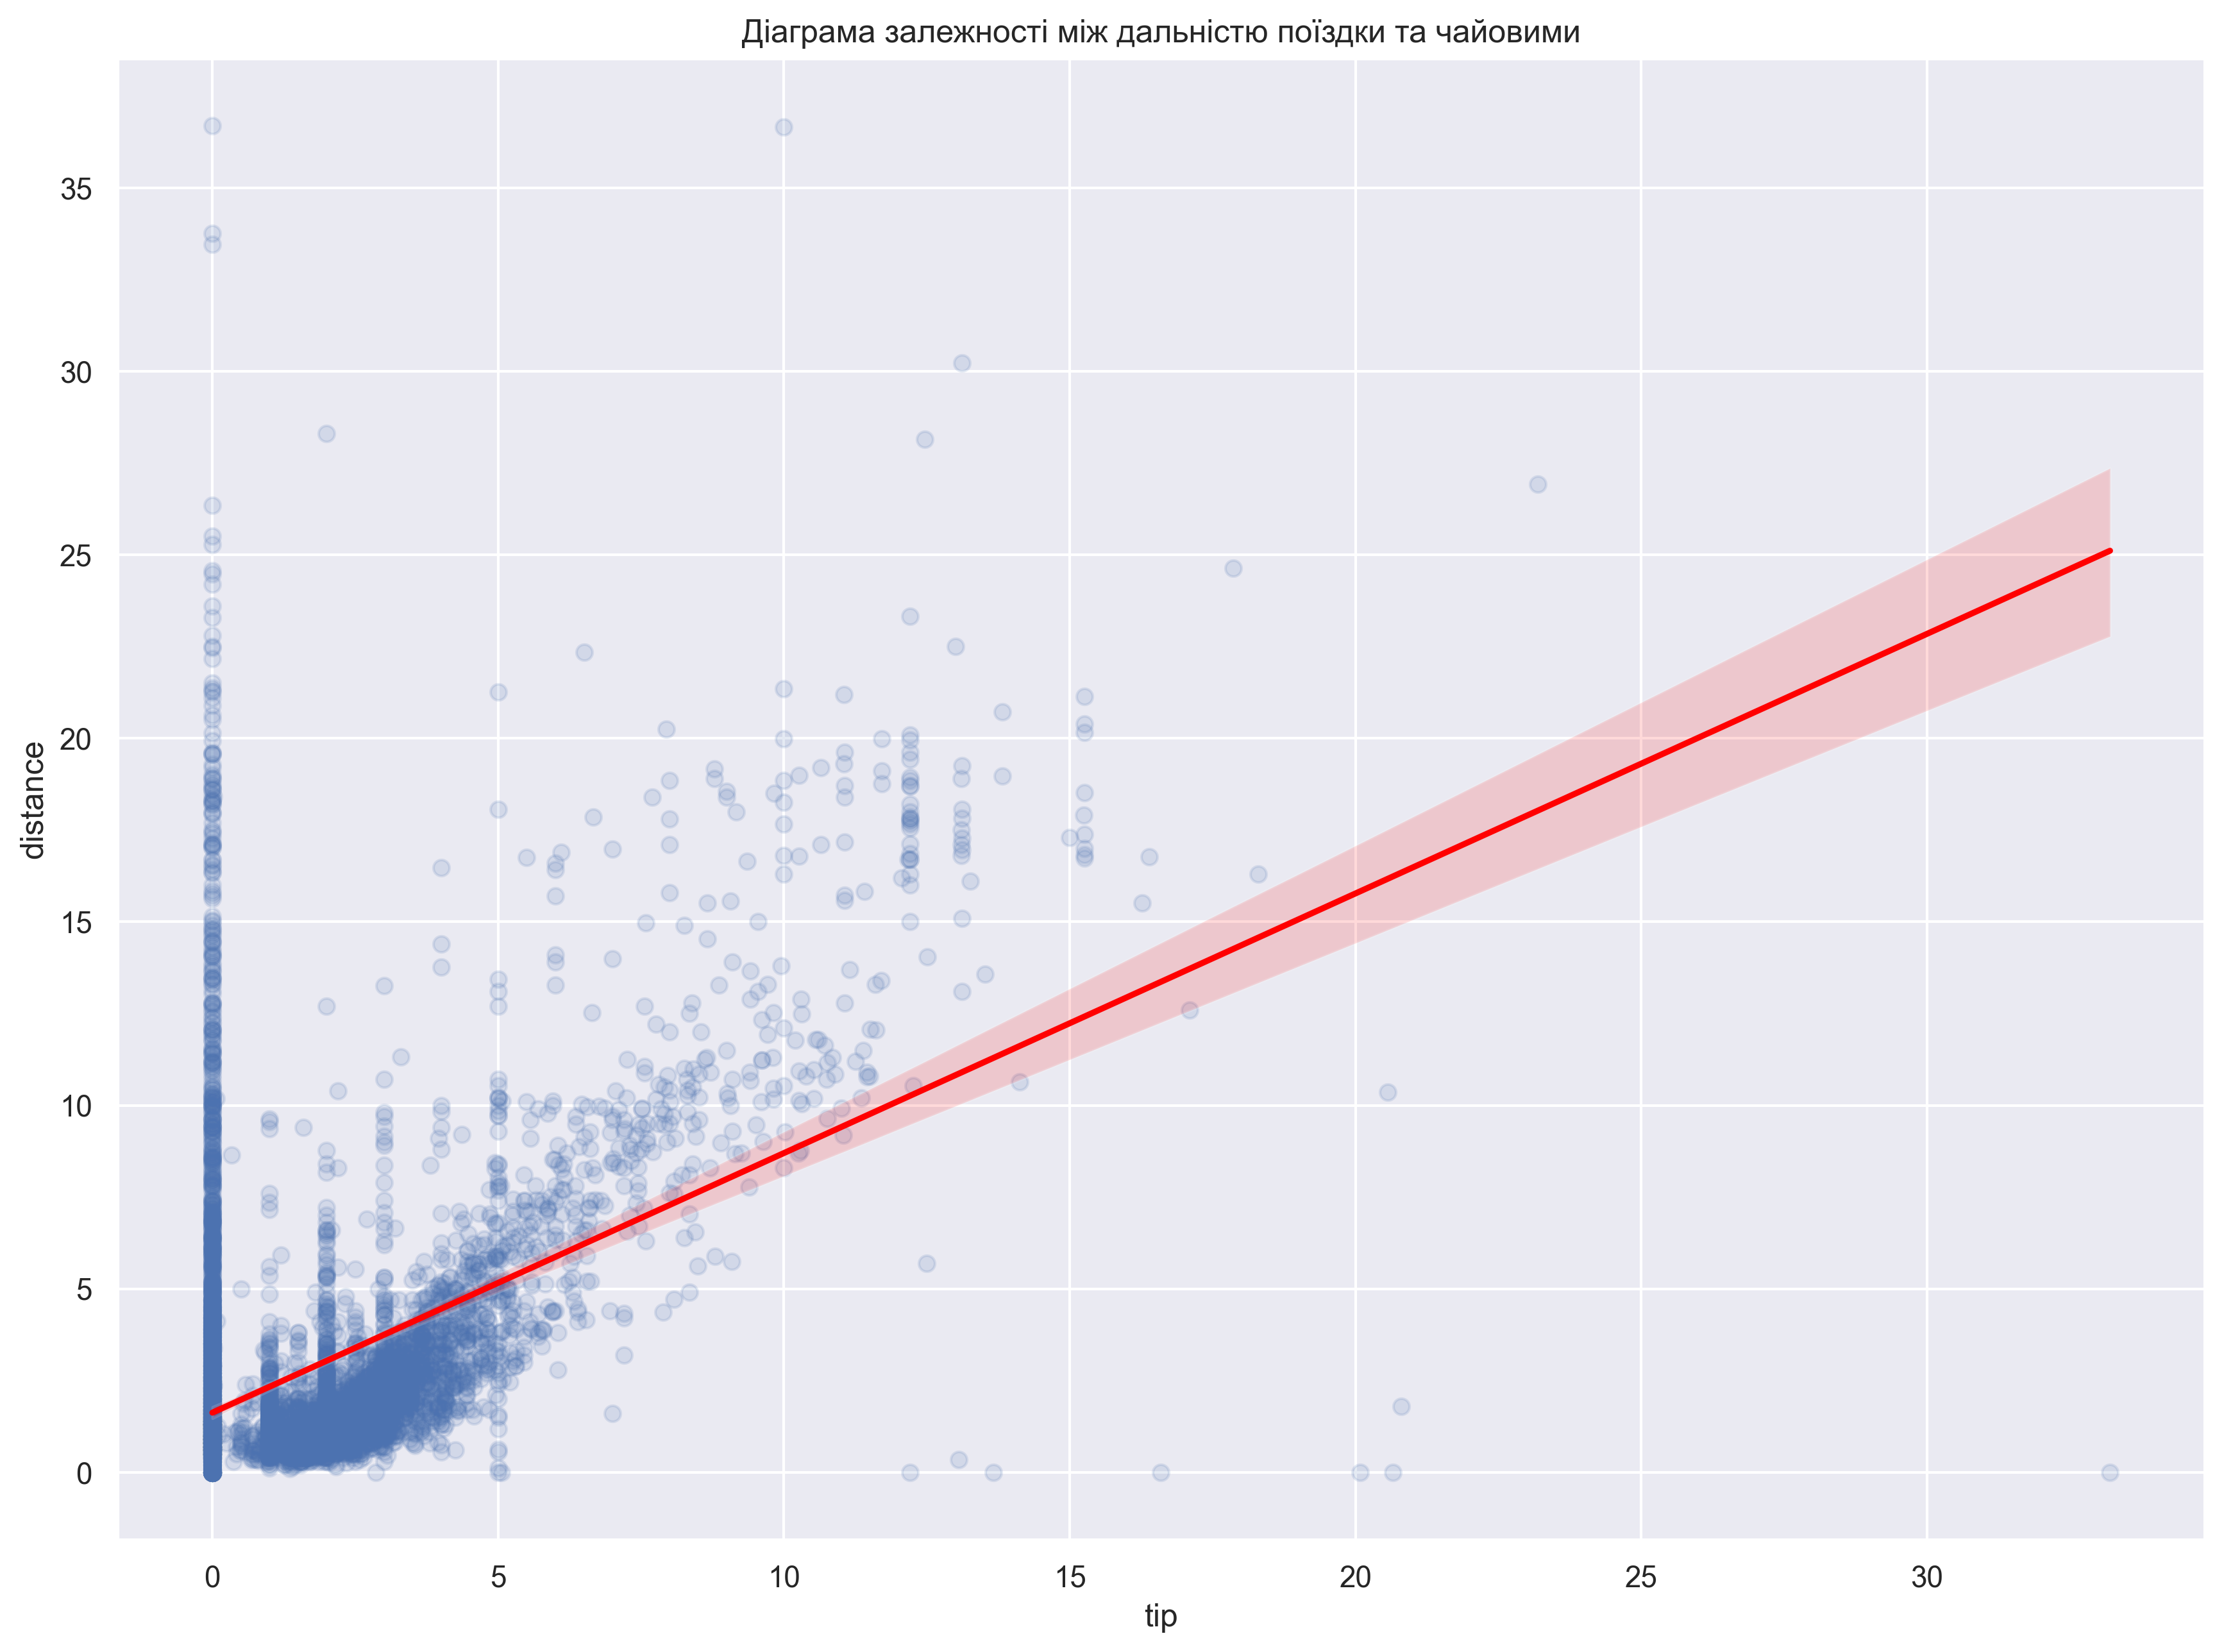

In [134]:
sns.regplot( data=df_taxi_clean,
            x='tip',
            y='distance', line_kws={'color': 'red'}, scatter_kws={'alpha':0.15})
plt.xlabel(
    'tip')
plt.ylabel(
    'distance')
plt.title('Діаграма залежності між дальністю поїздки та чайовими')

Один з можливих результатів (побудовано з seaborn):

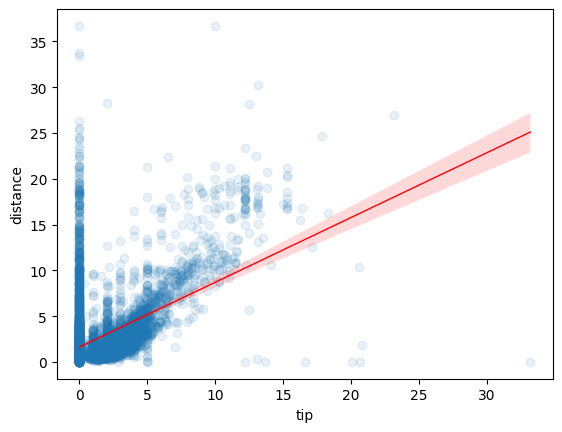

12.Дайте відповідь на питання: що означає пряма лінія з точок, паралельна осі, за якою розташована дальність поїздки?

In [25]:
#Ця лінія показує дистанцію поїздок з нульовими чайовими

13.Побудуйте поденну динаміку чайових по районам, в яких забрали пасажира. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. Важливо, щоб на одному графіку було 4 лінії (всі райони, крім `NA`), які відображають динаміку чайових, була легенда і були підписи вісей. В очікуваному результаті я надаю графік, який би будувала я. 

Дайте відповіді на питання:
- при початку поїздки в якому районі **найрідше** дають чайові?
- а в поїздках з якого району **найчастіше** дають чайові? 
- при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)?

Text(0.5, 1.0, 'Діаграма залежності між районом та чайовими')

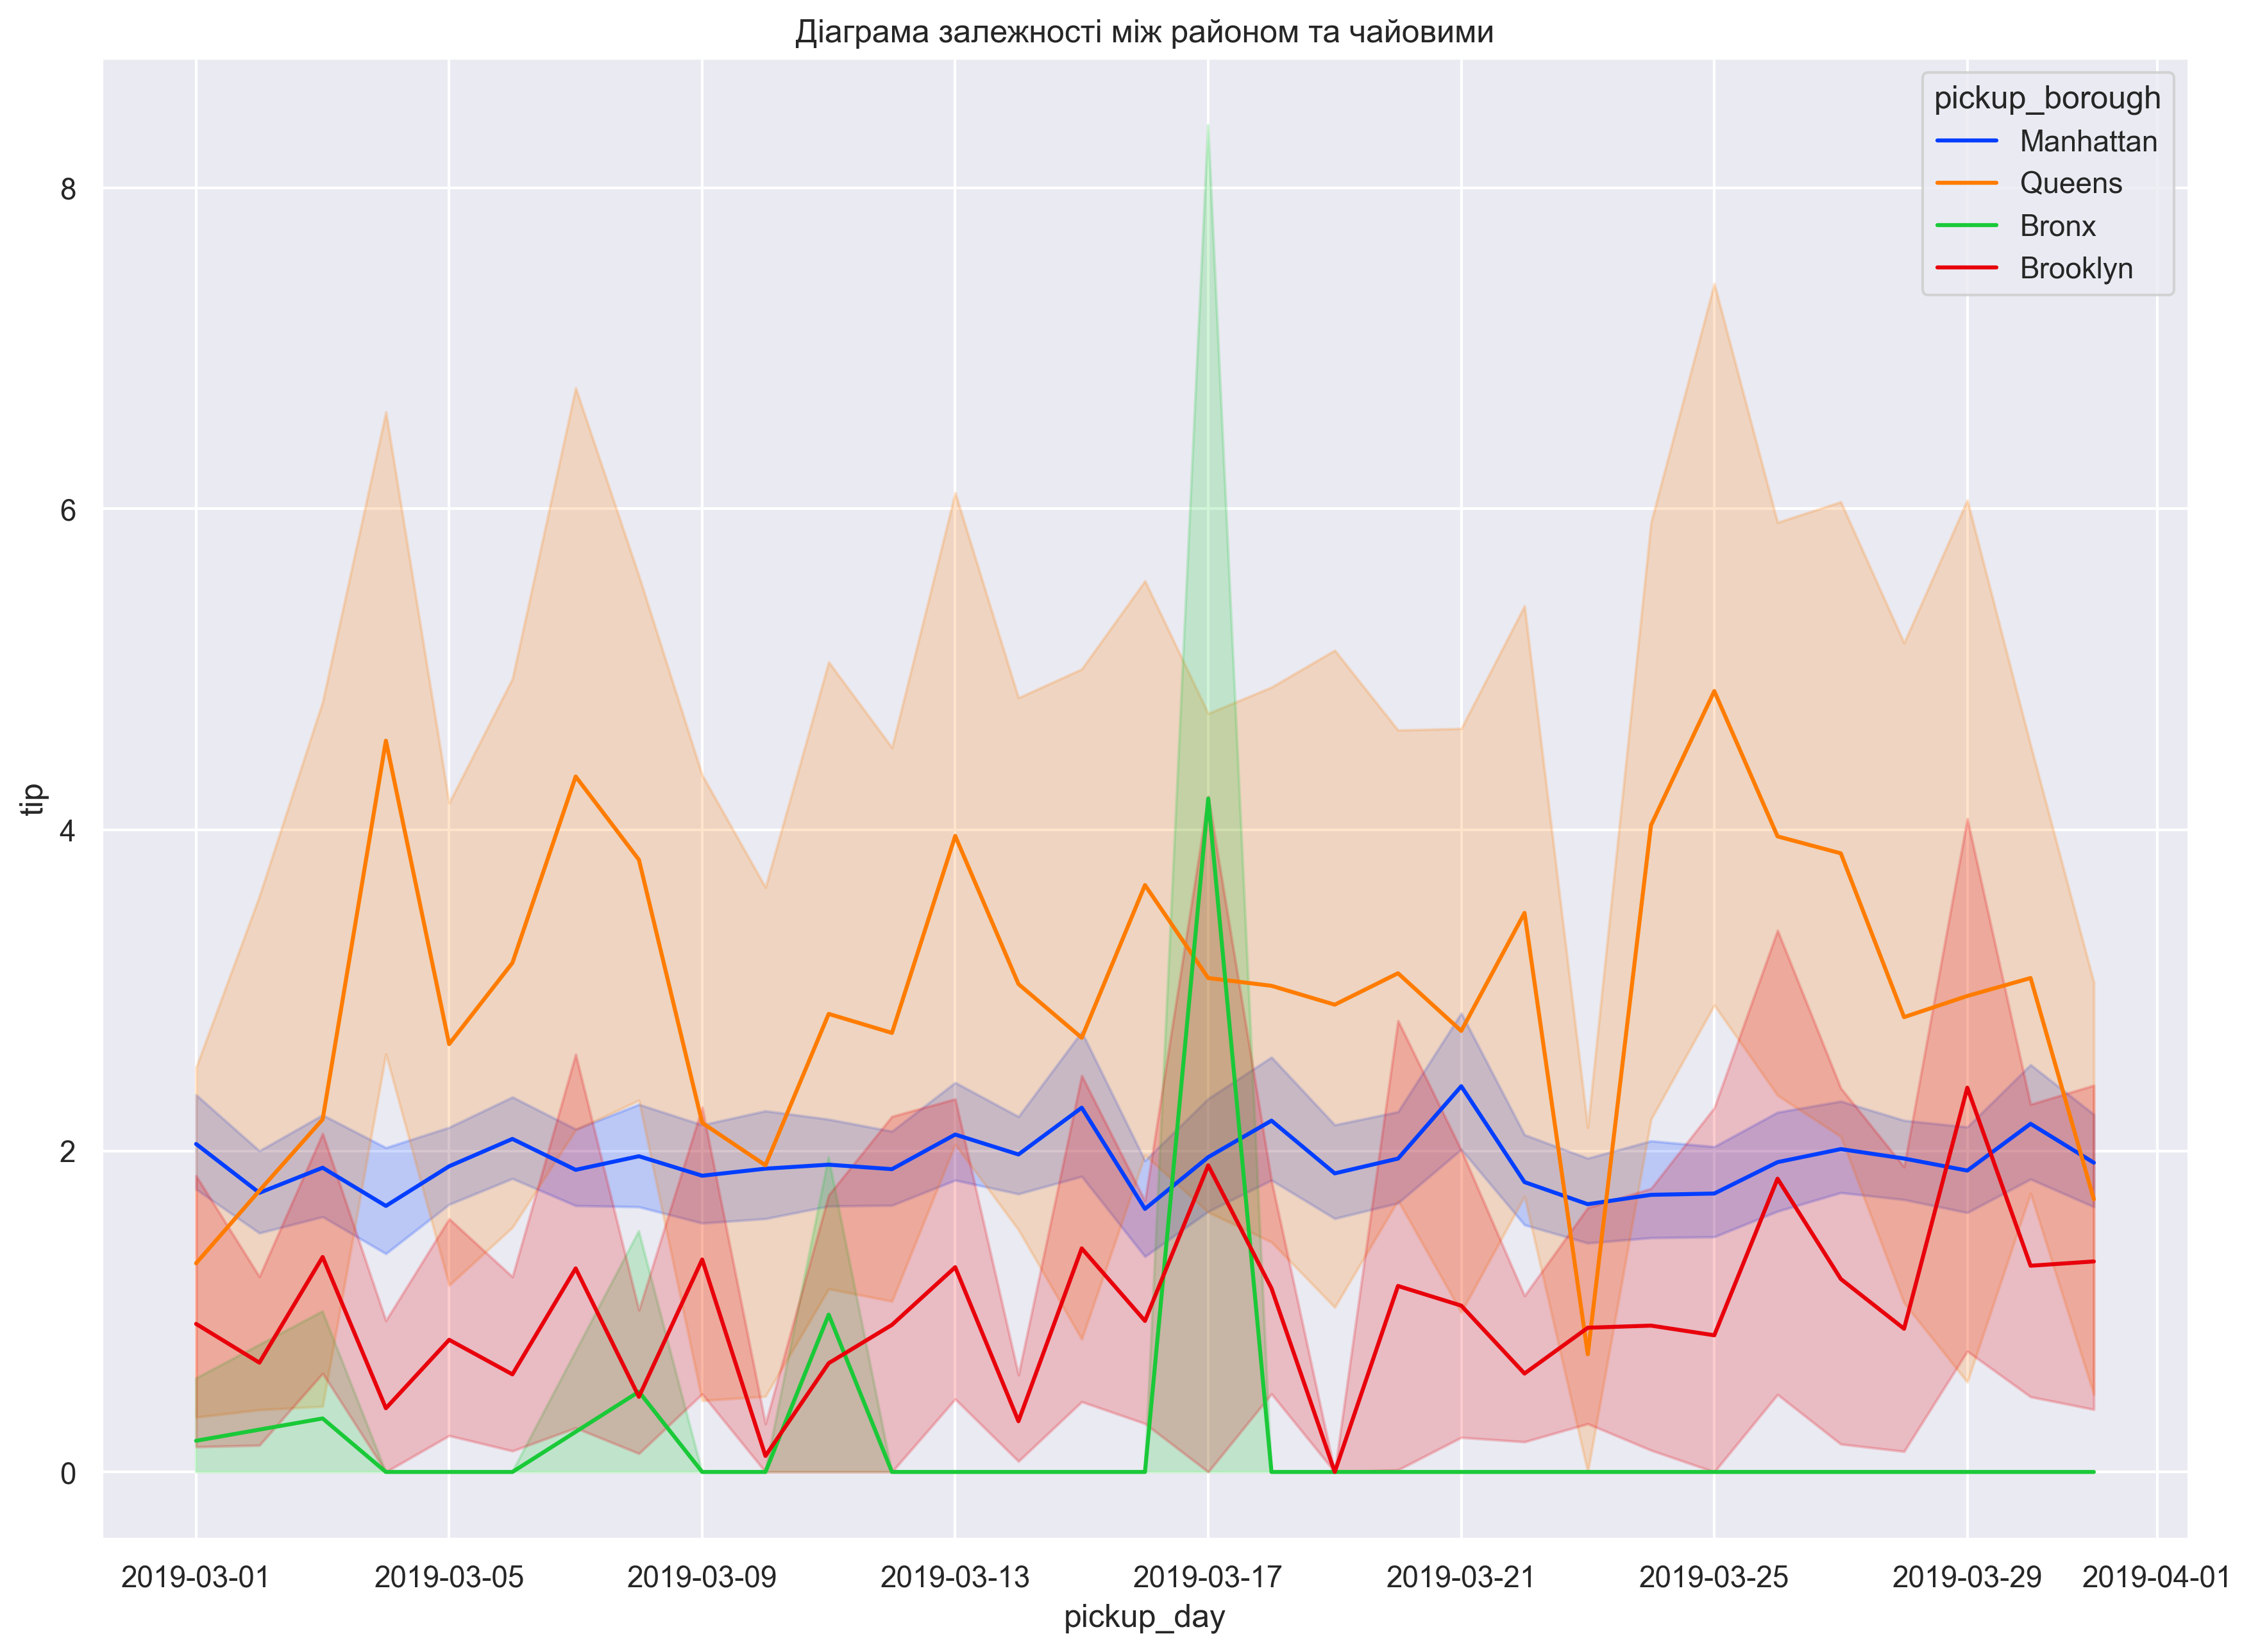

In [137]:
sns.lineplot(
    x='pickup_day',
    y='tip', 
    data=df_taxi_clean,  palette='bright', hue='pickup_borough')
plt.xlabel(
    'pickup_day')
plt.ylabel(
    'tip')
plt.title('Діаграма залежності між районом та чайовими')

#найрідше дають чайові - Bronx
#найчастіше дають чайові - Queens
#наcтабільніша сума чайових - Манхеттен

Один з можливих результатів (побудовано з seaborn):

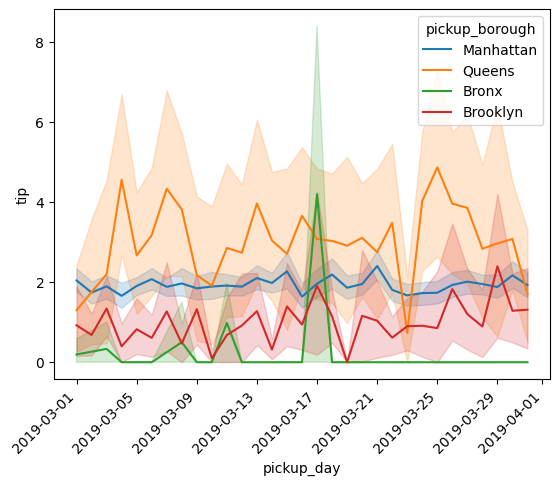

14.Побудуйте box-plot розміру чайових по району (всі райони, крім `NA`) старту поїздки. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

Text(0.5, 1.0, 'Діаграма залежності між районом та чайовими на старті поїздки')

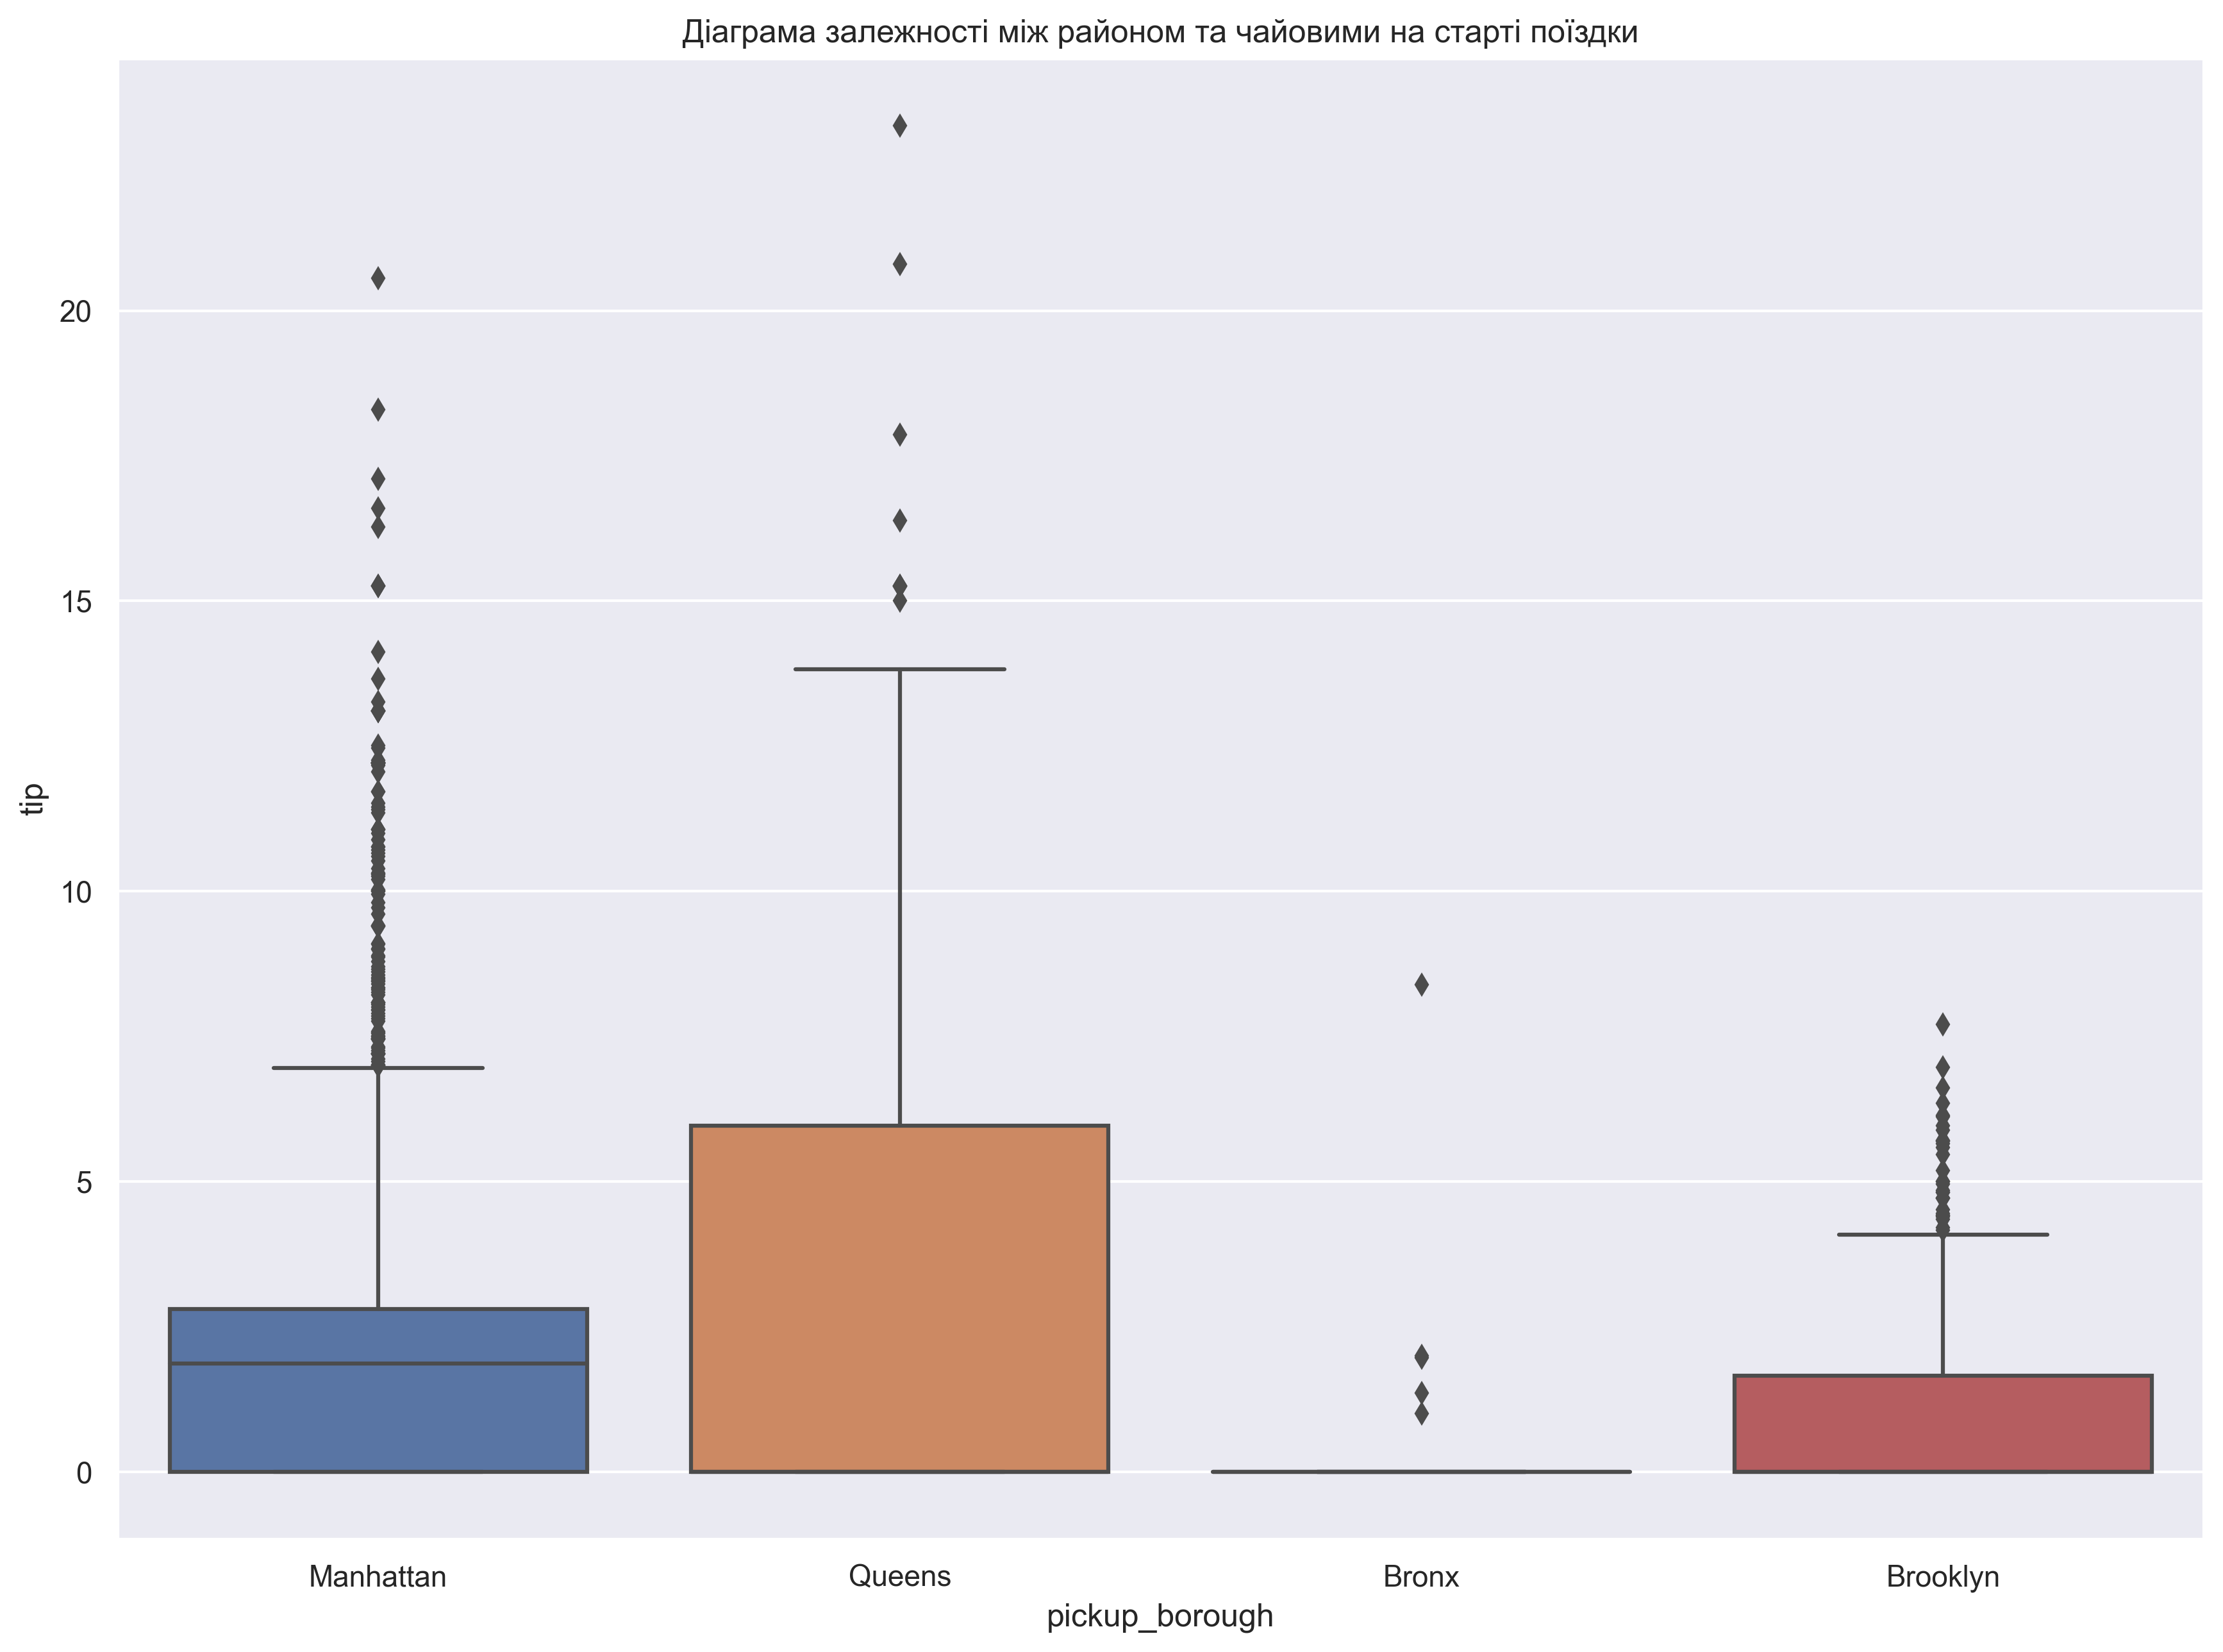

In [138]:
sns.boxplot(x='pickup_borough', y='tip', data=df_taxi_clean)
plt.xlabel(
    'pickup_borough')
plt.ylabel(
    'tip')
plt.title('Діаграма залежності між районом та чайовими на старті поїздки')

Один з можливих результатів (побудовано з seaborn):

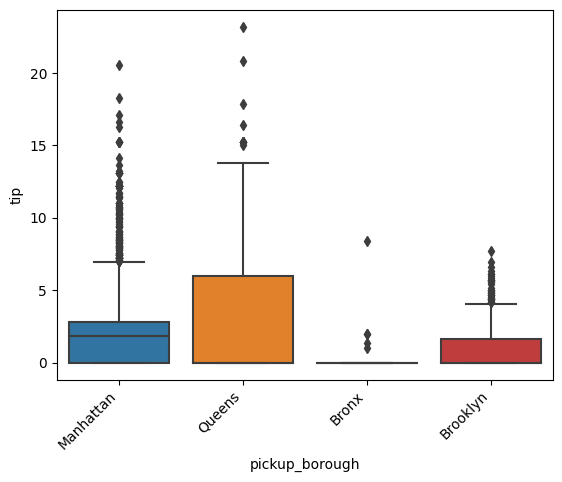

15.Творче завдання. Стовріть ТРИ інформативних візуалізації, які б допомогли в аналізі цих даних.   

Що вам було б цікаво дізнатись про ці поїздки? Як це можна було б використати при прийнятті рішень бізнесом? 
Наприклад, якщо найбільше поїздок в певний час доби, значить, треба стимулювати водіїв працювати в ці години. Якщо найбільше поїздок з певного району - треба тримати там запас авто, які б могли взяти пасажирів і т.д.
Не обмежуйте свою фантазію. 

Візуалізації мають бути не тими, на які ми вже побудували вище. Але можна створювати аналогічні, просто з використанням інших полів даних. І описати, що ви бачите з тих візуалізацій.
Кожна візуалізація оцінюється як 1 завдання. Без виконання цього завдання ДЗ не приймається. Якщо є питання щодо виконання - пишіть у чат.

Text(0.5, 1.0, 'Діаграма залежності вартості поїздки від часу')

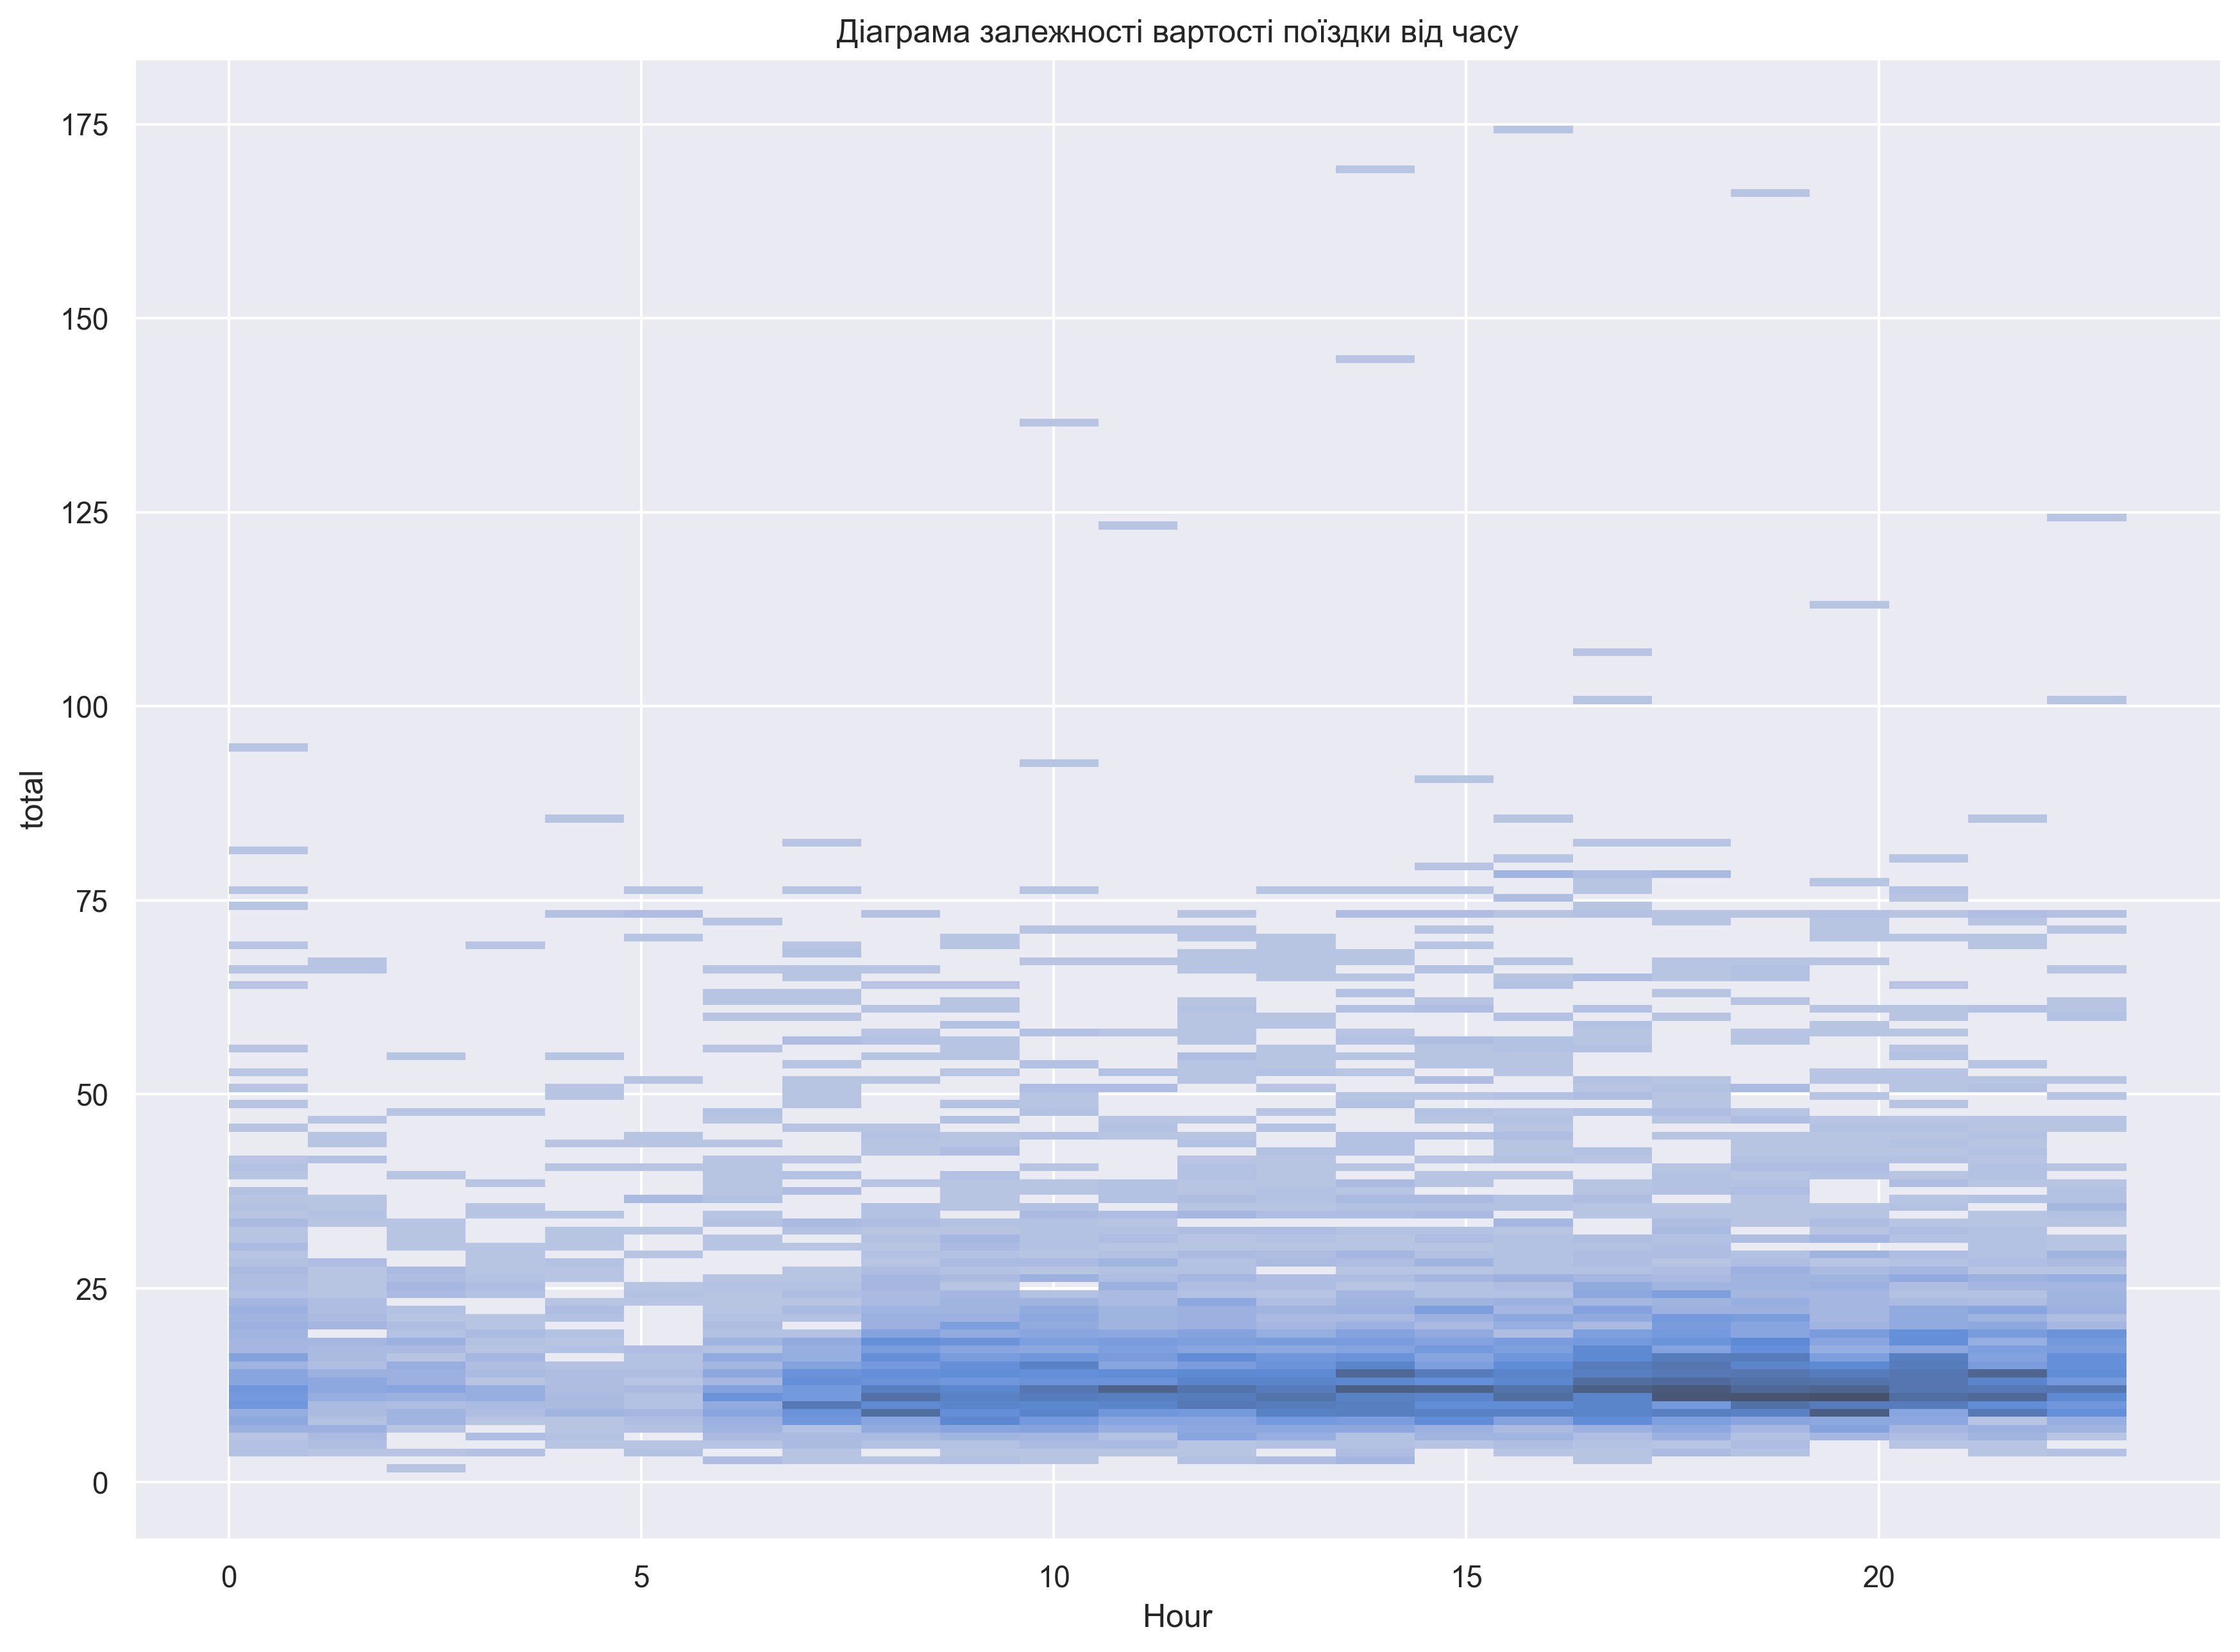

In [142]:
#1) Залежність total поїздки від часу доби. Інформація може бути корисною для водіїв (розуміння, в які години найкраще працювати) 
#та для власників бізнесу, так як total корелює з кількістю поїздок та їх дистанцією. 
df_taxi_clean['pickup_time'] = pd.to_datetime(df_taxi_clean['pickup']). dt.time.astype(str) #відділяю час зі змінної pickup
df_taxi_clean['Hour']=(df_taxi_clean.pickup_time.apply(lambda x: x.split(':')[0])).astype('int') #відділяю годину від часу
x = df_taxi_clean['Hour'] 
y = df_taxi_clean.groupby('Hour').sum(numeric_only=True)
sns.histplot( data=df_taxi_clean,
            x = 'Hour', y = 'total')
plt.xlabel(
    'Hour')
plt.ylabel(
    'total')
plt.title('Діаграма залежності вартості поїздки від часу')
#з візуалізації можемо зробити висновок, що максимально піковий час - з 16 до 20 години. Також популярними є проміжки з 8 до 11 та з 14 до 16. 

Text(0.5, 1.0, 'Діаграма залежності вартості поїздки по годинах та районах')

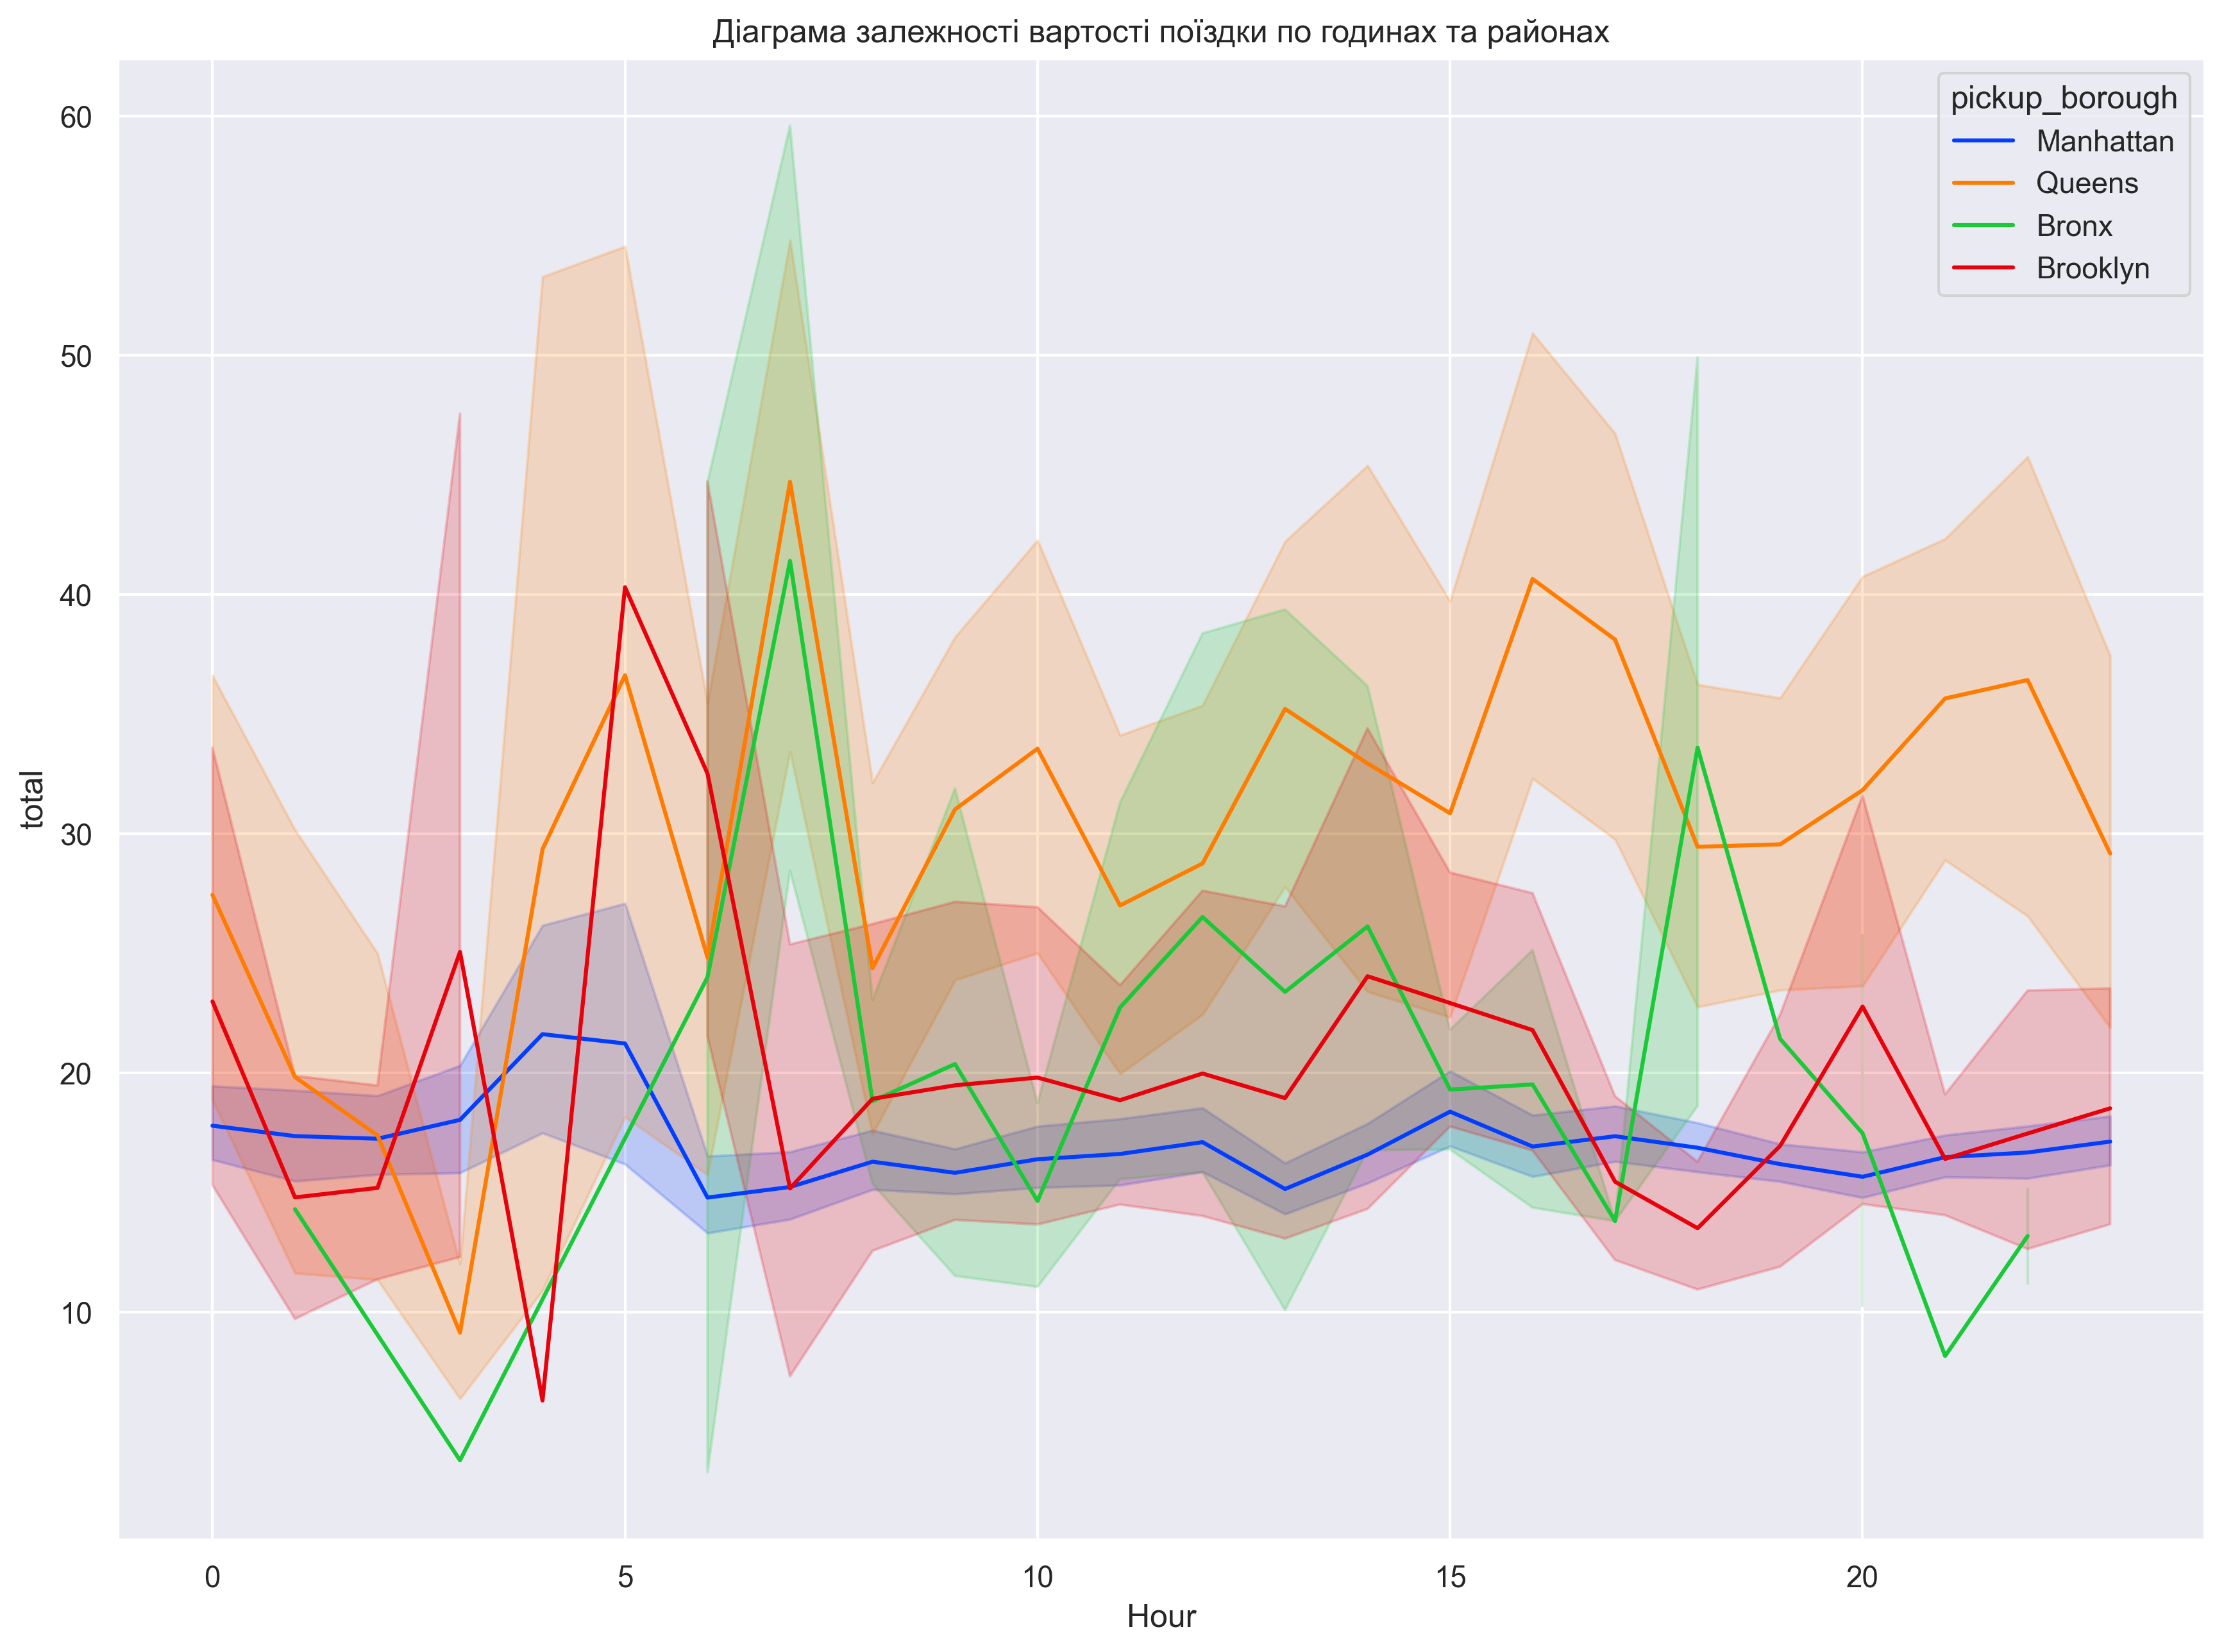

In [139]:
#1.2) Тепер візуалізуємо total по годинах, але окремо по районах. Цей графік дасть розуміння попиту в окремих районах, а не загалом
sns.lineplot(
    x='Hour',
    y='total', 
    data=df_taxi_clean,  palette='bright', hue='pickup_borough')
plt.xlabel(
    'Hour')
plt.ylabel(
    'total')
plt.title('Діаграма залежності вартості поїздки по годинах та районах')

Text(0.5, 1.0, 'Методи оплати клієнтів')

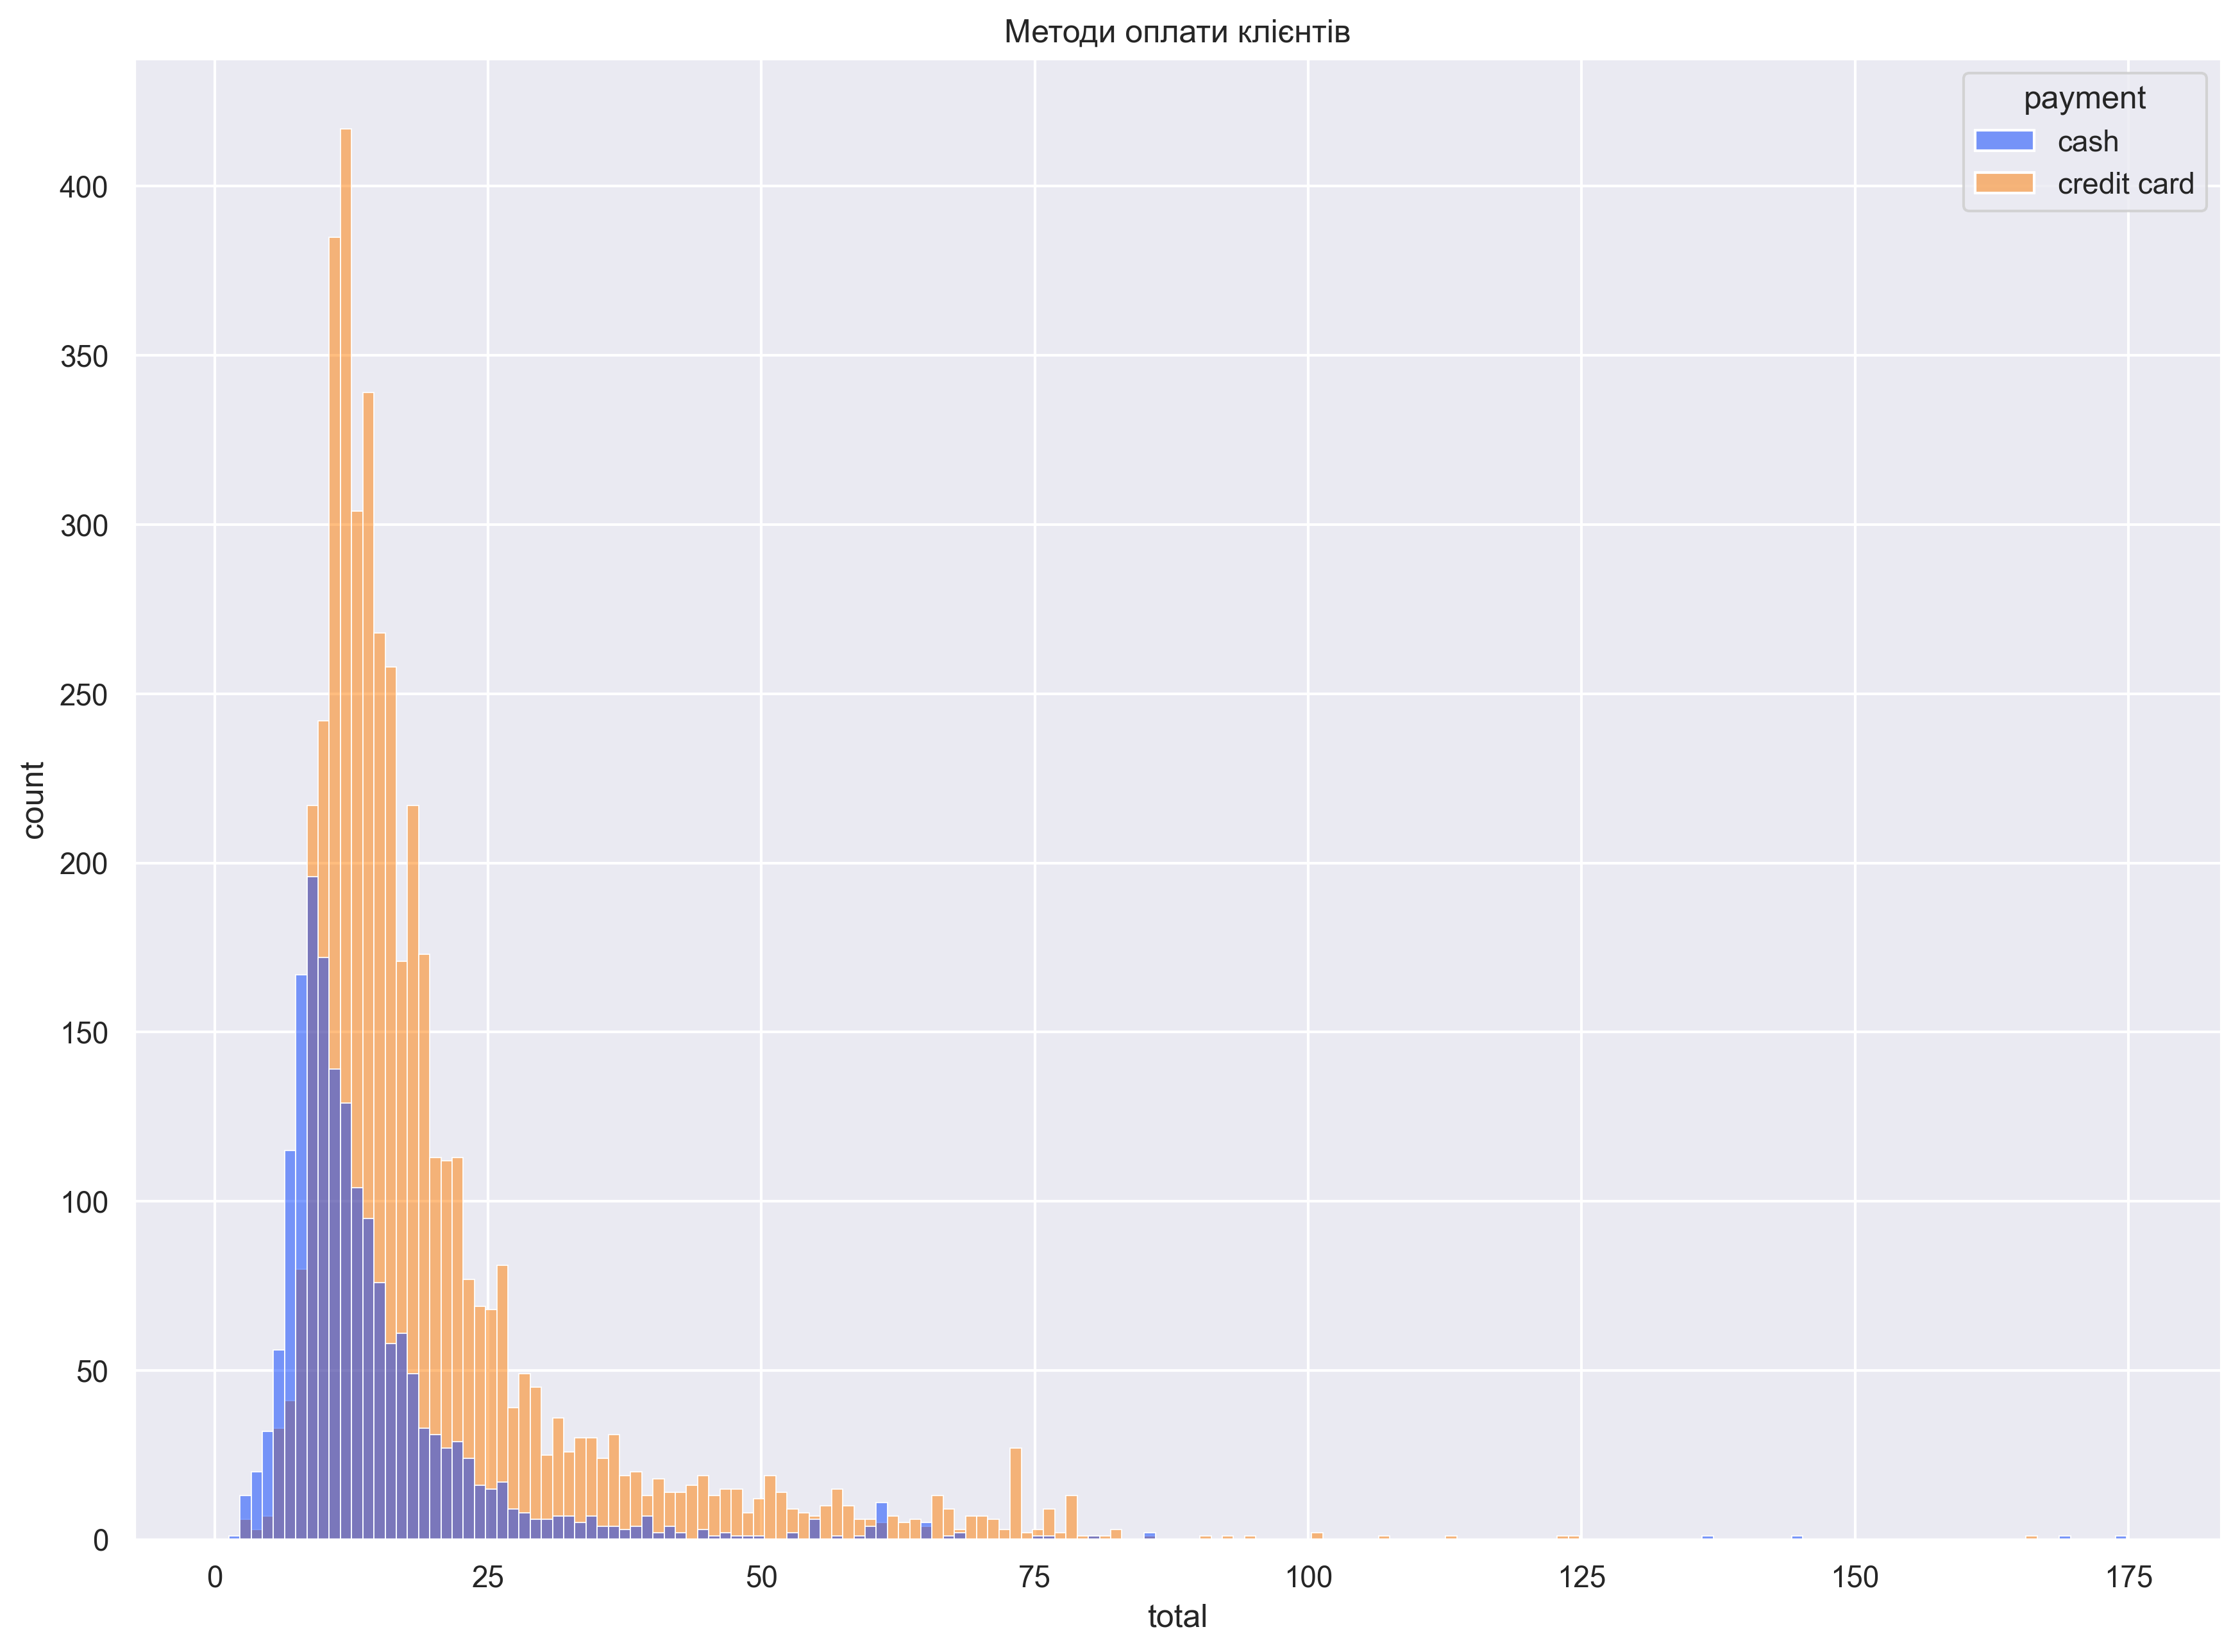

In [140]:
#2) Візуалізуємо, які методи оплати використовуються частіше клієнтами
sorted_df = df_taxi_clean.sort_values(by='payment')
sns.histplot(
    x='total',  
    data=sorted_df,  
    palette='bright',
    hue='payment');
plt.xlabel(
    'total')
plt.ylabel(
    'count')
plt.title('Методи оплати клієнтів')

Text(0.5, 1.0, 'залежність між наявністю платних доріг та сумою за поїздку')

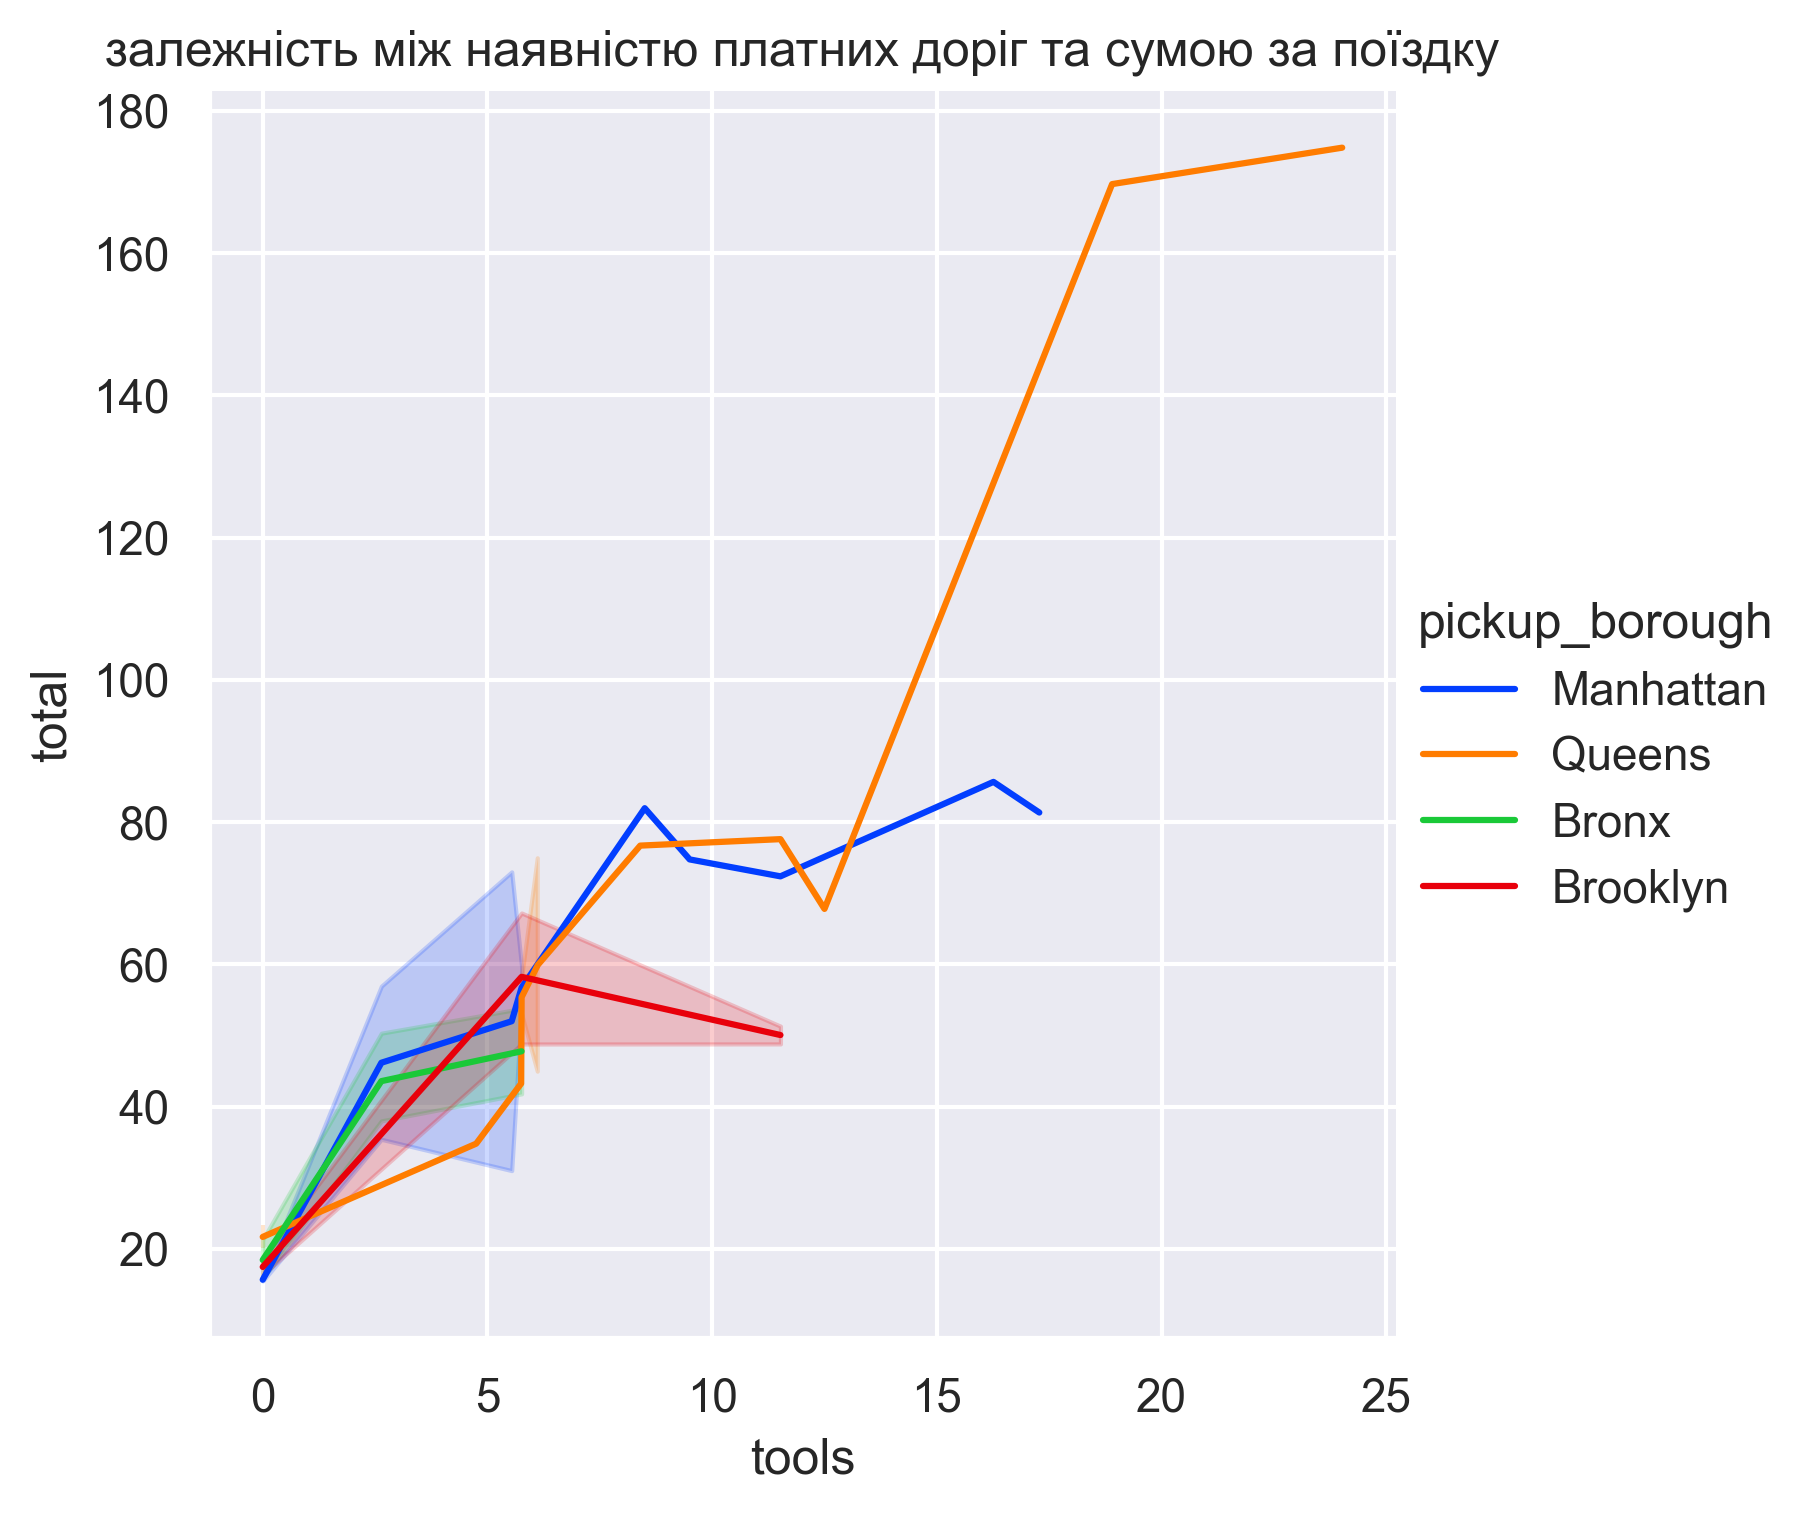

In [141]:
#3) графік, що відображає залежність між наявністю платних доріг та сумою за поїздку. Також сортуємо по районах для наглядності. 
#З графіку бачимо, що найбільше оплата за дороги впливає на тих, хто їде з Queens-у
sns.relplot(
    x='tolls', 
    y='total', 
    data=df_taxi_clean, 
    palette='bright',
    kind='line', 
    hue='pickup_borough');
plt.xlabel(
    'tools')
plt.ylabel(
    'total')
plt.title('залежність між наявністю платних доріг та сумою за поїздку')
